__________________________________________________________________________________
# **Data Analysis of AWS SAAS Dataset**
**by Ivan Robi Septian**
__________________________________________________________________________________

**Opening**

My data exploration strategy begins with **data cleaning and anomaly detection** to **transform raw data into an accurate, consistent, and analysis-ready format** by identifying and correcting errors, handling missing data, standardizing formats, removing duplicates, and validating data integrity. Following this, I will conduct **detailed data analysis aligned with business objectives**, encompassing analyses to derive **actionable insights and support informed decision-making, ultimately driving strategic business planning.**

![aws.jpg](aws.jpg)


**AWS BACKGROUND**

**Amazon Web Services (AWS) is the cloud computing arm of Amazon.com**, the global e-commerce giant. **Launched in 2006**, AWS has **grown to become the dominant force in cloud computing**, serving millions of customers worldwide, from startups to Fortune 500 companies.

At its core, AWS offers a vast array of cloud-based services, including computing power, storage solutions, databases, machine learning tools, and more. These services enable businesses to offload their IT infrastructure and operations to the cloud, eliminating the need for costly hardware investments and reducing the complexity of managing data centers.

AWS operates on a pay-as-you-go pricing model, allowing businesses to scale their resources up or down based on demand, and pay only for the services they use. This flexibility is particularly attractive to businesses with fluctuating workloads or those looking to rapidly scale their operations.

**One of the key benefits of AWS is its global infrastructure**. **With data centers located in regions around the world**, AWS enables businesses to **deploy their applications closer to their customers**, reducing latency and improving performance. **SaaS applications are typically accessed via web browsers**, which means that **users do not need to install or maintain software locally on their computers**. AWS (Amazon Web Services) **primarily operates on a subscription-based model.**

## Data Cleaning And Anomaly Detection

** DATA DICTIONARY **
| No | Name of the attribute | Description |
|----|------------------------|-------------|
| 1  | Row ID                 | A unique identifier for each transaction. |
| 2  | Order ID               | **A unique identifier for each order.** |
| 3  | Order Date             | The date when the order was placed. |
| 4  | Date Key               | A numerical representation of the order date (YYYYMMDD). |
| 5  | Contact Name           | The name of the person who placed the order. |
| 6  | Country                | The country where the order was placed. |
| 7  | City                   | The city where the order was placed. |
| 8  | Region                 | The region where the order was placed. |
| 9  | Subregion              | The subregion where the order was placed. |
| 10 | Customer               | The name of the company that placed the order. |
| 11 | Customer ID            | A unique identifier for each customer. |
| 12 | Industry               | The industry the customer belongs to. |
| 13 | Segment                | The customer segment (SMB, Strategic, Enterprise, etc.). |
| 14 | Product                | The product that was ordered. |
| 15 | License                | **The license key for the product.** |
| 16 | Sales                  | The total sales amount for the transaction. |
| 17 | Quantity               | The total number of items in the transaction. |
| 18 | Discount               | The discount applied to the transaction. |
| 19 | Profit                 | The profit from the transaction. |


### IMPORT LIBRARY AND DATASET

In [754]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
import seaborn as sns
import matplotlib.dates as mdates
from scipy import stats
from IPython.display import display
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro

In [755]:
df = pd.read_csv(r'C:\Users\ivans\OneDrive\Documents\practice\NUMPY\Practice\explore_it\AWS SaaS Sales\SaaS-Sales.csv')
df.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


There is an anomaly with the "Date Key" field, where it has the same value as the "Order Date" field, making it redundant. Additionally, since an index already exists, the "Row ID" is unnecessary and can be removed.

### Check The Data Types

In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

"Order Date" field should be in datetime format but is currently an object.

### Statistic Descriptive

In [757]:
# To show each column statistic descriptive
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


There are no anomalies in the quantitative data. However, upon reviewing the qualitative data, I have observed some irregularities with the "Order ID." Further investigation is warranted to understand the nature of these anomalies.

### Checking for Missing Values and Observations

In [758]:
data_info= []
for col in df.columns :
    data_info.append( [col, df.dtypes[col], df[col].isna().sum(), df[col].nunique(), df[col].unique()])

tabel_info = pd.DataFrame(columns=['Column Name', 'Data Type','Missing Value','Total Unique', 'Unique Value'],
                     data=data_info)
display(tabel_info)
print(f'Total Missing Value: {df.isnull().sum().sum()}')
print(f'Total Row: {df.shape[0]} and Total Col: {df.shape[1]}')


,Column Name,Data Type,Missing Value,Total Unique,Unique Value
0,Row ID,int64,0,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,object,0,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,object,0,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
3,Date Key,int64,0,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,object,0,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,object,0,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,object,0,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,object,0,3,"[EMEA, AMER, APJ]"
8,Subregion,object,0,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,object,0,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


Total Missing Value: 0
Total Row: 9994 and Total Col: 19


While there are no missing values in the dataset, there are several data type adjustments needed for optimal analysis. Firstly, the "Order Date" column's datatype must be converted to datetime to facilitate time-based analysis. Secondly, although the "Customer ID" column contains numerical values, it is considered qualitative data in this context and thus requires a datatype change. Additionally, certain columns deemed unnecessary will be dropped from the dataset to streamline analysis and improve clarity.

### Check Duplicate Data

In [759]:
display(df[df.duplicated(keep=False)])
print(f'Total Duplicate: {df.duplicated().sum()}')

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


Total Duplicate: 0


confirmed that there are no duplicate records present in the dataset.

### Manual Inspection of a Subset of Data for Further Assurance

We need to check it manually also

In [760]:
# Check Unique Values exist in dataset
# To show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(df):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return data_unique
display(unique_data(df))
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')



,Columns,Unique Count,Unique
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 20201226, 20200920

Upon further examination, no anomalies were detected aside from those previously mentioned, so based on this we dont need to check using **regex**. However, it is noteworthy that the "License" column contains the same number of entries as the total number of rows. This indicates that each row corresponds to a unique license.

Furthermore, the "Sales" column exhibits a remarkably high number of unique values, with **5825** unique entries. This warrants a closer investigation to better understand the nature of these unique sales entries.

These observations provide valuable insights into the dataset's characteristics and will guide our subsequent analysis to ensure thoroughness and accuracy.

### Change the datatype

In [761]:
# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Change dtype of 'Customer ID' column to string
df['Customer ID'] = df['Customer ID'].astype(str)
df.head(2)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820


### Checking Whitespace


In [762]:
# Define a function to detect excessive whitespace
def has_excessive_whitespace(value):
    if isinstance(value, str):
        return bool(re.search(r'\s{2,}', value))  # Check for 2 or more spaces
    return False

# Process whitespace detection and present findings
whitespace_info = []
for col in df.columns:
    has_whitespace = df[col].apply(has_excessive_whitespace).any()
    whitespace_info.append({'Column': col, 'Has Excessive Whitespace': has_whitespace})

whitespace_df = pd.DataFrame(whitespace_info)
whitespace_df


,Column,Has Excessive Whitespace
0,Row ID,False
1,Order ID,False
2,Order Date,False
3,Date Key,False
4,Contact Name,False
5,Country,False
6,City,False
7,Region,False
8,Subregion,False
9,Customer,False


The table shows that there are no excessive spaces. This helps us spot and fix any problems caused by extra spaces in the text columns of the dataset.

### Cheking Anomaly

After identifying the anomalies mentioned earlier, it's essential to delve deeper into the data to ensure its cleanliness and quality before proceeding further. This analysis involves examining data integrity and cleanliness to spot any anomalies or discrepancies, gaining deeper insights into data characteristics, such as distribution, trends, and potential anomalies, re-verifying data against its original source or established standards for accuracy and consistency, and performing additional cleaning if new issues or anomalies arise during further analysis. By conducting a comprehensive analysis, we can ensure that the data used is reliable and representative for subsequent analysis.

In [763]:
# Define the columns to check for duplicates
columns_to_check = ['Order ID']
# Find duplicated rows based on the specified columns
duplicated_rows = df[df.duplicated(subset=columns_to_check, keep=False)]
# Display the filtered and sorted DataFrame
duplicated_rows.head(5)


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694


Upon noticing identical Order IDs, further investigation is warranted.

In [764]:
# Define the columns to check for duplicates
columns_to_check = ['Order ID','Product']

# Filter the DataFrame to get rows with the same values in the specified columns
filtered_df = df

# Sort the filtered DataFrame by 'Order Date'
sorted_df = filtered_df.sort_values(by=['Order ID','Product'])

# Find duplicated rows based on the specified columns
duplicated_rows = sorted_df[sorted_df.duplicated(subset=columns_to_check, keep=False)]

# Display the filtered and sorted DataFrame
duplicated_rows.head(10)


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
6287,6288,AMER-2020-100090,2020-07-08,20200708,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,4BEAB9UXKH,502.488,3,0.2,-87.9354
6288,6289,AMER-2020-100090,2020-07-08,20200708,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,AVBMH39MTD,196.704,6,0.2,68.8464
6316,6317,AMER-2020-100762,2020-11-24,20201124,Ella Simpson,Brazil,Rio de Janeiro,AMER,LATAM,HonHai Precision Industry,1033,Tech,Strategic,Support,V5SQA48WYZ,144.120,3,0.0,69.1776
6317,6318,AMER-2020-100762,2020-11-24,20201124,Ella Simpson,Brazil,Rio de Janeiro,AMER,LATAM,HonHai Precision Industry,1033,Tech,Strategic,Support,5F2LX40BDP,15.960,2,0.0,7.9800
3843,3844,AMER-2020-101931,2020-10-28,20201028,Olivia Graham,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,Support,AM9OXWPZDS,6.280,2,0.0,0.0628
3844,3845,AMER-2020-101931,2020-10-28,20201028,Olivia Graham,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,Support,K1SO5AHJYM,480.740,2,0.0,14.4222
824,825,AMER-2020-102071,2020-05-09,20200509,Charles Churchill,United States,Los Angeles,AMER,NAMER,Lowes,1060,Retail,SMB,Data Smasher,4V8C7D3OCF,67.800,4,0.0,4.0680
825,826,AMER-2020-102071,2020-05-09,20200509,Charles Churchill,United States,Los Angeles,AMER,NAMER,Lowes,1060,Retail,SMB,Data Smasher,Z1VANFRH9I,167.970,3,0.0,40.3128
6015,6016,AMER-2020-102652,2020-04-06,20200406,Samantha Ince,United States,New York City,AMER,NAMER,Panasonic,1091,Tech,Strategic,SaaS Connector Pack,4ADBF7II3M,91.960,2,0.0,15.6332
6016,6017,AMER-2020-102652,2020-04-06,20200406,Samantha Ince,United States,New York City,AMER,NAMER,Panasonic,1091,Tech,Strategic,SaaS Connector Pack,Y490YS8J8A,33.110,7,0.0,12.9129


In this dataframe, we have encountered anomalies where there are row IDs with identical data but differing license values, along with sales, quantity, and discount values that seem inconsistent. 
For example, in Row ID **6288**, the product "ContactMatcher" has a quantity of 3, sales of 502.488, and a discount of 0.2, while in Row ID **6289**, the same product has a quantity of 6, but sales are only 196.704. 
<br>
Another example is in Row ID **3844**, where the product "Support" has a quantity of 2, sales of 6.280, and a discount of 0.0, whereas in Row ID **4845**, the same product has a quantity of 2, but sales are significantly higher at 480.740, with the same discount of 0.0. With data like this, we cannot assume a correlation between discount, quantity, and sales. Further comparison with rows in other datasets is necessary to investigate these discrepancies.

In [765]:
duplicated_order_ids = df['Order ID'].duplicated(keep=False)

# Filter out rows where 'Order ID' appears more than once
df_unique_order_ids = df[~duplicated_order_ids]

pd.set_option('display.max_columns', 200)
# Define the columns to check for duplicates
columns_to_check = ['Product','Sales']

# Filter the DataFrame to get rows with the same values in the specified columns
filtered_df = df_unique_order_ids[(df_unique_order_ids['Product']=='Support') & (df_unique_order_ids['Discount']==0.0) & (df_unique_order_ids['Segment']=='SMB') ]

# Sort the filtered DataFrame by 'Order Date'
sorted_df = filtered_df.sort_values(by=['Product','Sales','Segment'])

# Find duplicated rows based on the specified columns
duplicated_rows = sorted_df[sorted_df.duplicated(subset=columns_to_check, keep=False)]

# Display the filtered and sorted DataFrame
duplicated_rows.head(10)


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
160,161,AMER-2022-162733,2022-05-12,20220512,Joanne Carr,United States,New York City,AMER,NAMER,J.P. Morgan Chase & Co.,1054,Finance,SMB,Support,LG6VGH3BOI,5.98,1,0.0,2.6910
7069,7070,AMER-2020-141901,2020-08-09,20200809,Jonathan Brown,United States,Philadelphia,AMER,NAMER,Oracle,1072,Tech,SMB,Support,111OWDPBBW,5.98,1,0.0,2.6910
1086,1087,EMEA-2022-167584,2022-08-13,20220813,Amy Scott,Netherlands,Amsterdam,EMEA,EU-WEST,Walmart,1096,Retail,SMB,Support,PICAPOMVIH,6.48,1,0.0,3.1104
1869,1870,AMER-2022-148201,2022-08-27,20220827,Jasmine MacLeod,Canada,Toronto,AMER,NAMER,Aetna,1002,Healthcare,SMB,Support,TPP2LPBBWB,6.48,1,0.0,3.1104
5003,5004,AMER-2022-155033,2022-10-08,20221008,Samantha Walker,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Support,E6763IG4JR,10.56,2,0.0,5.0688
5256,5257,APJ-2022-130078,2022-08-09,20220809,Jasmine MacLeod,Singapore,Singapore,APJ,APAC,Aetna,1002,Healthcare,SMB,Support,MEK9ELKY4T,10.56,2,0.0,4.7520
9365,9366,EMEA-2020-166828,2020-08-22,20200822,Justin Pullman,Poland,Krakow,EMEA,EU-WEST,HonHai Precision Industry,1033,Tech,SMB,Support,N22JMQN3Q7,11.56,2,0.0,5.6644
9638,9639,AMER-2023-125808,2023-11-13,20231113,Sean Scott,United States,New York City,AMER,NAMER,Prudential Financial,1078,Finance,SMB,Support,99Z40GE2TM,11.56,2,0.0,5.6644
2267,2268,AMER-2023-137470,2023-09-18,20230918,Steven Rees,Canada,Toronto,AMER,NAMER,Siemens,1043,Manufacturing,SMB,Support,H2QNW8TJ0D,12.96,2,0.0,6.3504
4951,4952,AMER-2021-144190,2021-06-09,20210609,Carl Langdon,Brazil,São Paulo,AMER,LATAM,Itochu,1032,Finance,SMB,Support,3IW13P3XW3,12.96,2,0.0,6.2208


Now let's take a look.
Row ID **1087**, with identical segment, product, sales, quantity, and discount values: sales of 6.48 with quantity 1 and discount 0.
<br>
Row ID **1870**, also with identical segment, product, sales, quantity, and discount values: sales of 6.48 with quantity 1 and discount 0.
<br>
We can assume that certain features like product, segment, or specific order dates have reasonable sales, quantity, and discount values.
Let's further investigate.
<br>
Comparing these two Row IDs with Row IDs **2268** or **4952**, which share the same segment and product, and have sales of 12.96 with quantity 2 and discount 0.0, we can conclude that for certain criteria, the sales column represents the sum of product prices per quantity, indicating that higher quantities result in higher sales.
Let's delve deeper into the discount aspect.

In [766]:
duplicated_order_ids = df['Order ID'].duplicated(keep=False)

# Filter out rows where 'Order ID' appears more than once
df_unique_order_ids = df[~duplicated_order_ids]

pd.set_option('display.max_columns', 200)
# Define the columns to check for duplicates
columns_to_check = ['Product','Sales']

# Filter the DataFrame to get rows with the same values in the specified columns
filtered_df = df_unique_order_ids[(df_unique_order_ids['Product']=='Support') & (df_unique_order_ids['Discount']==0.2) & (df_unique_order_ids['Segment']=='SMB') ]

# Sort the filtered DataFrame by 'Order Date'
sorted_df = filtered_df.sort_values(by=['Product','Sales','Segment'])

# Find duplicated rows based on the specified columns
duplicated_rows = sorted_df[sorted_df.duplicated(subset=columns_to_check, keep=False)]

# Display the filtered and sorted DataFrame
duplicated_rows.head(10)


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
3409,3410,AMER-2023-150847,2023-05-01,20230501,Caroline Burgess,Mexico,Mexico City,AMER,LATAM,J.P. Morgan Chase & Co.,1054,Finance,SMB,Support,RQZAITS3FI,10.368,2,0.2,3.6288
7761,7762,APJ-2023-123071,2023-12-04,20231204,Amelia Martin,Japan,Ibaraki,APJ,JAPN,Walmart,1096,Retail,SMB,Support,J5XXXLH324,10.368,2,0.2,3.6288
9963,9964,EMEA-2021-143700,2021-07-26,20210726,Diane Buckland,France,Paris,EMEA,EU-WEST,Ford Motor,1009,Manufacturing,SMB,Support,UUX03PMDVA,10.368,2,0.2,3.6288
12,13,EMEA-2023-114412,2023-04-16,20230416,Adrian Hunter,Sweden,Stockholm,EMEA,NOR,Engie,1062,Energy,SMB,Support,FE5QJBIUN1,15.552,3,0.2,5.4432
2105,2106,EMEA-2020-167633,2020-09-30,20200930,Sonia Miller,Germany,Dresden,EMEA,EU-WEST,Pfizer,1074,Healthcare,SMB,Support,QSXYHCWU7Y,15.552,3,0.2,5.4432
5113,5114,APJ-2022-147970,2022-01-31,20220131,Kylie Poole,Japan,Aichi,APJ,JAPN,Lukoil,1044,Energy,SMB,Support,3UP3ZRWJ8F,15.552,3,0.2,5.4432
7048,7049,EMEA-2022-119515,2022-08-15,20220815,Alexandra Slater,South Africa,Johannesburg,EMEA,MEA,Trafigura Group,1100,Finance,SMB,Support,FDJJH2PQG1,15.552,3,0.2,5.4432


Let's delve deeper into this issue while referencing the previous data. Rows ID **3410 and 7762** exhibit identical segment and product details, with sales totaling 10,368, a quantity of 2, and a discount of 0.2. 
<br>
When we calculate the sales per quantity using the formula **sales / (1 - discount)/ quantity, we get (10,368 / (1 - 0.2)) / 2, resulting in 12,960 / 2, or 6,480**. 
<br>
This aligns with the findings from previous experiments (Row IDs **1087 and 1870**) or Row IDs 2268 and 4952, which have sales of 12,960 without a discount. This indicates that the sales value represents the product price multiplied by quantity, adjusted for discounts, commonly known as Net Sales or the value of sales after discounts. Hence, it's imperative to **consolidate rows with the same order ID but differing license values**, as discrepancies like these can lead to delayed payments or inaccurate revenue input, impacting business operations.

### Combine Row Duplicate Order ID

In [767]:
# Group by 'Order ID' and 'Product' and aggregate other columns
combined_df = df.groupby(['Order ID', 'Product', 'Country', 'City']).agg({
    'Row ID': 'first',
    'Order Date': 'first',
    'Date Key': 'first',
    'Contact Name': 'first',
    'Region': 'first',
    'Subregion': 'first',
    'Customer': 'first',
    'Customer ID': 'first',
    'Industry': 'first',
    'Segment': 'first',
    'License': lambda x: ', '.join(map(str, x.unique())),
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Profit': 'sum'
}).reset_index()

new_order = ['Row ID','Order ID', 'Order Date', 'Date Key', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'License', 'Product','Sales', 'Quantity', 'Discount', 'Profit']
combined_df = combined_df[new_order]
combined_df.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,License,Product,Sales,Quantity,Discount,Profit
0,6288,AMER-2020-100090,2020-07-08,20200708,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,"4BEAB9UXKH, AVBMH39MTD",ContactMatcher,699.192,9,0.2,-19.0890
1,1172,AMER-2020-100279,2020-03-10,20200310,Luke Davidson,Brazil,São Paulo,AMER,LATAM,Ford Motor,1009,Manufacturing,SMB,NI5MITNJ98,Support,22.380,2,0.0,10.7424
2,3836,AMER-2020-100363,2020-04-08,20200408,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,0O2MCUTMFW,Storage,2.368,2,0.2,0.8288
3,3837,AMER-2020-100363,2020-04-08,20200408,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,7ZEJI08M1P,Support,19.008,3,0.2,6.8904
4,6315,AMER-2020-100762,2020-11-24,20201124,Ella Simpson,Brazil,Rio de Janeiro,AMER,LATAM,HonHai Precision Industry,1033,Tech,Strategic,9WNGMUMGIU,ChatBot Plugin,151.920,4,0.0,45.5760


In [768]:
# Define the columns to check for duplicates
columns_to_check = ['Product','Sales']

# Filter the DataFrame to get rows with the same values in the specified columns
filtered_df = combined_df[(combined_df['Product']=='Support') & (combined_df['Discount']==0.0) & (combined_df['Segment']=='SMB') ]

# Sort the filtered DataFrame by 'Order Date'
sorted_df = filtered_df.sort_values(by=['Product','Sales','Segment'])

# Find duplicated rows based on the specified columns
duplicated_rows = sorted_df[sorted_df.duplicated(subset=columns_to_check, keep=False)]

# Display the filtered and sorted DataFrame
duplicated_rows.tail(50)


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,License,Product,Sales,Quantity,Discount,Profit
1826,1307,AMER-2022-141397,2022-06-21,20220621,Lucas Mathis,United States,Newark,AMER,NAMER,Lowes,1060,Retail,SMB,LJ4SAT9HKE,Support,46.76,7,0.0,22.4448
8015,4389,EMEA-2023-111556,2023-11-21,20231121,Lillian Duncan,United Kingdom,London,EMEA,UKIR,Sprint Nextel,1081,Communications,SMB,B259DTZU22,Support,46.76,7,0.0,22.4448
1746,3985,AMER-2022-135265,2022-07-08,20220708,Alexander Langdon,United States,New York City,AMER,NAMER,BMW,1039,Manufacturing,SMB,R1TFAPETAE,Support,48.94,1,0.0,24.4700
5249,1791,EMEA-2020-102008,2020-09-30,20200930,Faith Jones,United Kingdom,London,EMEA,UKIR,Sony,1028,Tech,SMB,UE2EXTUSGM,Support,48.94,1,0.0,24.4700
337,7570,AMER-2020-133830,2020-12-05,20201205,Irene Wright,United States,New York City,AMER,NAMER,Chevron,1017,Energy,SMB,3YYVJTHBVM,Support,49.12,4,0.0,23.0864
3880,2735,APJ-2021-129770,2021-02-21,20210221,Kimberly Manning,New Zealand,Auckland,APJ,ANZ,AmerisourceBergen,1007,Healthcare,SMB,2FSG2WKCPI,Support,49.12,4,0.0,23.0864
5607,6335,EMEA-2020-133305,2020-07-11,20200711,Theresa Cameron,United Kingdom,London,EMEA,UKIR,Siemens,1043,Manufacturing,SMB,FINMQQNOP0,Support,49.12,4,0.0,23.0864
7767,5252,EMEA-2022-169369,2022-12-13,20221213,Jennifer Avery,Finland,Helsinki,EMEA,NOR,Chevron,1017,Energy,SMB,VE1JBR6OPM,Support,49.12,4,0.0,23.0864
8605,8148,EMEA-2023-146822,2023-06-10,20230610,Richard Lyman,Spain,Madrid,EMEA,EU-WEST,Bank of America Corp.,1011,Finance,SMB,8E37CP5XHU,Support,49.12,4,0.0,23.0864
8616,3128,EMEA-2023-147564,2023-10-03,20231003,Rachel Blake,United Kingdom,London,EMEA,UKIR,Humana,1049,Healthcare,SMB,V4FU1MJHJC,Support,49.12,4,0.0,23.0864


This is the insight

In [769]:
# Define the columns to check for duplicates
columns_to_check = ['Product','Sales']

# Filter the DataFrame to get rows with the same values in the specified columns
filtered_df = combined_df[(combined_df['Product']=='Support') & (combined_df['Discount']==0.0) & (combined_df['Segment']=='SMB')  & (combined_df['Row ID'].isin([6365, 9683, 9207]))]

# Sort the filtered DataFrame by 'Order Date'
sorted_df = filtered_df.sort_values(by=['Product','Sales','Segment'])

# Find duplicated rows based on the specified columns
duplicated_rows = sorted_df[sorted_df.duplicated(subset=columns_to_check, keep=False)]
duplicated_rows


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,License,Product,Sales,Quantity,Discount,Profit
2367,6365,AMER-2023-110443,2023-11-22,20231122,Evan Ince,Canada,Calgary,AMER,NAMER,Banco Santander,1101,Finance,SMB,0AWE9TQ48G,Support,51.84,8,0.0,24.8832
2574,9683,AMER-2023-122770,2023-12-14,20231214,Sean Scott,United States,Los Angeles,AMER,NAMER,Prudential Financial,1078,Finance,SMB,"XS7AQM2ZDS, H6YT2GKOJZ",Support,51.84,8,0.0,25.0128
7438,9207,EMEA-2022-146423,2022-04-22,20220422,Rebecca May,Saudi Arabia,Jeddah,EMEA,MEA,Anthem,1029,Healthcare,SMB,3URO8T3R1L,Support,51.84,8,0.0,24.8832


Here we can observe that after consolidation, the sales price, quantity, and discount show correlation. However, there are still numerous data points that seem illogical. Some have the same order ID but different cities or countries, which, if merged, would distort geographical-based analysis. Additionally, there are still many **inconsistencies**, suggesting possible input errors or data from unreliable sources.

### Drop Irrelevant Columns

In [770]:
# Drop 'Row ID' and 'Date Key' columns
combined_df = combined_df.drop(columns=['Row ID', 'Date Key','Contact Name','Customer ID'])
combined_df.head(5)

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,License,Product,Sales,Quantity,Discount,Profit
0,AMER-2020-100090,2020-07-08,United States,Los Angeles,AMER,NAMER,Verizon Communications,Communications,Strategic,"4BEAB9UXKH, AVBMH39MTD",ContactMatcher,699.192,9,0.2,-19.0890
1,AMER-2020-100279,2020-03-10,Brazil,São Paulo,AMER,LATAM,Ford Motor,Manufacturing,SMB,NI5MITNJ98,Support,22.380,2,0.0,10.7424
2,AMER-2020-100363,2020-04-08,Chile,Santiago,AMER,LATAM,Carrefour,Retail,Strategic,0O2MCUTMFW,Storage,2.368,2,0.2,0.8288
3,AMER-2020-100363,2020-04-08,Chile,Santiago,AMER,LATAM,Carrefour,Retail,Strategic,7ZEJI08M1P,Support,19.008,3,0.2,6.8904
4,AMER-2020-100762,2020-11-24,Brazil,Rio de Janeiro,AMER,LATAM,HonHai Precision Industry,Tech,Strategic,9WNGMUMGIU,ChatBot Plugin,151.920,4,0.0,45.5760


### **Normality Checking/ Distribution**

- Normality test in data is crucial because many statistical methods assume that the data follows a normal distribution.
- When data is normally distributed, it behaves in a predictable way around the mean.
- If the data doesn’t follow this pattern, it might affect the accuracy of statistical tests and lead to incorrect conclusions.

**Normality tests help determine if the data meets the assumption of normality required by certain statistical techniques. If it doesn’t, alternative methods or transformations might be needed for reliable analysis.**


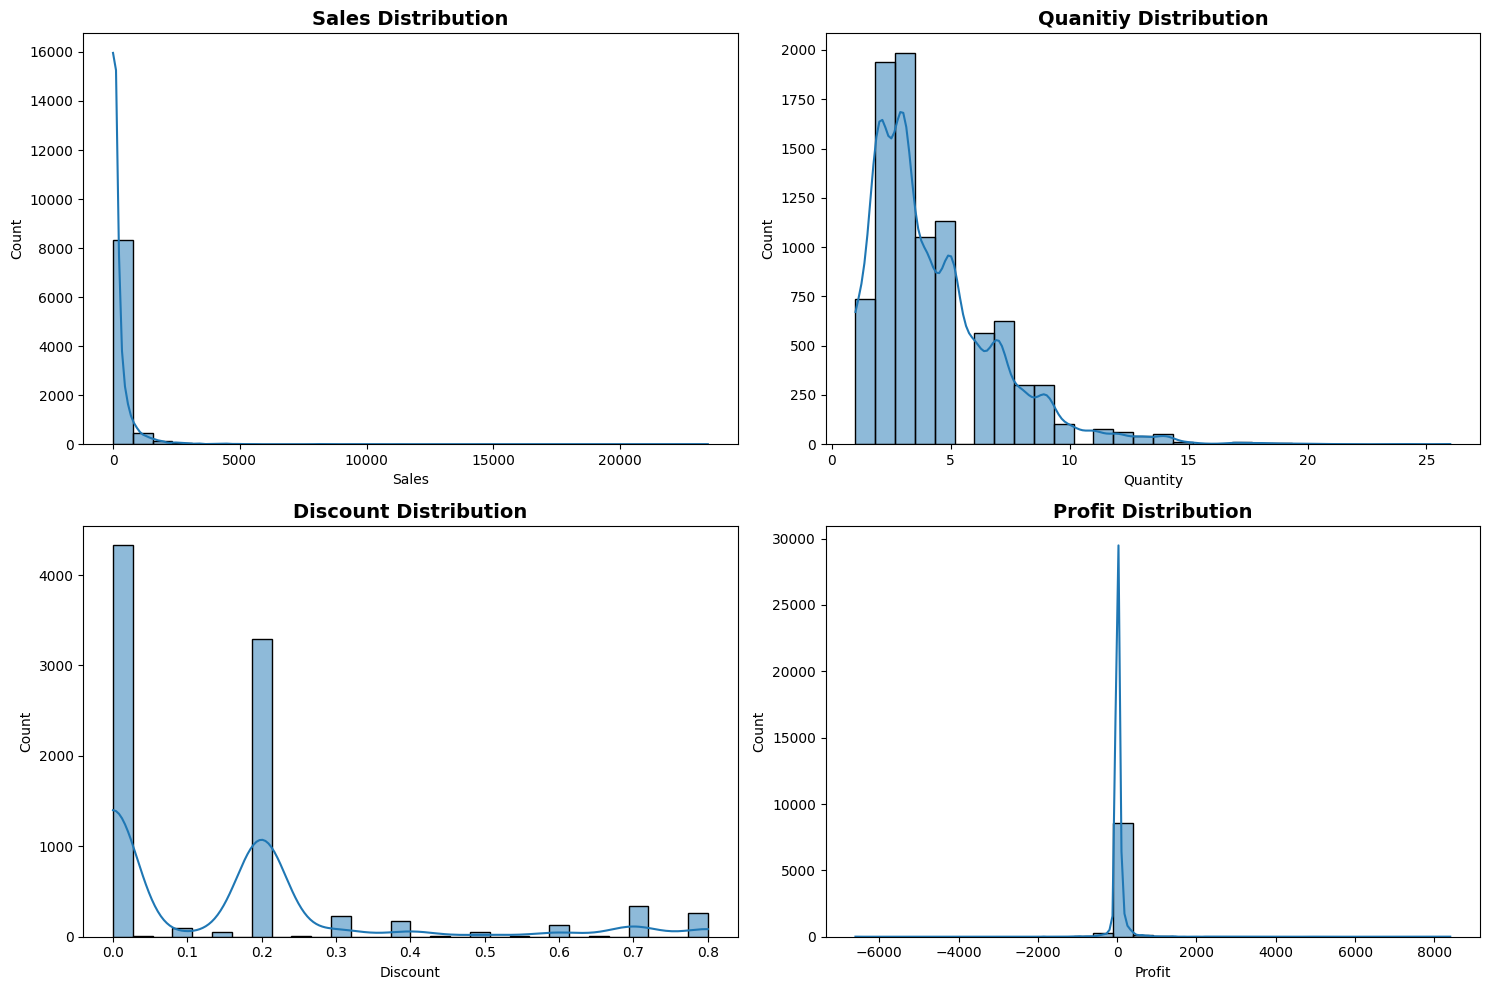

In [771]:
# Analyzing distribution of numerical data consist of Sales, Discount, Quantity, and Profit

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Sales Distribution
sns.histplot(combined_df['Sales'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Quantity Distribution
sns.histplot(combined_df['Quantity'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Quanitiy Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Discount Distribution
sns.histplot(combined_df['Discount'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Discount Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Profit Distribution
sns.histplot(combined_df['Profit'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Profit Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

plt.tight_layout()
plt.show()

We can observe that the data does not appear to be normally distributed. However, to confirm this observation, we need to conduct statistical tests.

In [813]:
# Sales
lilliefors(combined_df['Sales'])
lf_statistic, lf_pvalue = lilliefors(combined_df['Sales'])
print('Sales :')
if lf_pvalue > 0.05:
    print(f'Lilliefors P-value: {lf_pvalue}. So, we assume a normal distribution')
else: 
    print(f'Lilliefors P-value: {lf_pvalue}. So, we do not assume a normal distribution')
shapiro(combined_df['Sales'])
sw_statistic, sw_pvalue = shapiro(combined_df['Sales'])
if sw_pvalue > 0.05:
    print(f'Saphiro P-Value: {sw_pvalue}. So, we assume a normal distribution')
else: 
    print(f'Saphiro P-Value: {sw_pvalue}. So, we do not assume a normal distribution')

# Profit
lilliefors(combined_df['Profit'])
lf_statistic, lf_pvalue = lilliefors(combined_df['Profit'])
print('\nProfit :')
if lf_pvalue > 0.05:
    print(f'Lilliefors P-value: {lf_pvalue}. So, we assume a normal distribution')
else: 
    print(f'Lilliefors P-value: {lf_pvalue}. So, we do not assume a normal distribution')
shapiro(combined_df['Profit'])
sw_statistic, sw_pvalue = shapiro(combined_df['Sales'])
if sw_pvalue > 0.05:
    print(f'Saphiro P-Value: {sw_pvalue}. So, we assume a normal distribution')
else: 
    print(f'Saphiro P-Value: {sw_pvalue}. So, we do not assume a normal distribution')

# Discount
lilliefors(combined_df['Discount'])
lf_statistic, lf_pvalue = lilliefors(combined_df['Discount'])
print('\nDiscount :')
if lf_pvalue > 0.05:
    print(f'Lilliefors P-value: {lf_pvalue}. So, we assume a normal distribution')
else: 
    print(f'Lilliefors P-value: {lf_pvalue}. So, we do not assume a normal distribution')
shapiro(combined_df['Discount'])
sw_statistic, sw_pvalue = shapiro(combined_df['Discount'])
if sw_pvalue > 0.05:
    print(f'Saphiro P-Value: {sw_pvalue}. So, we assume a normal distribution')
else: 
    print(f'Saphiro P-Value: {sw_pvalue}. So, we do not assume a normal distribution')

# Quantity
lilliefors(combined_df['Quantity'])
lf_statistic, lf_pvalue = lilliefors(combined_df['Quantity'])
print('\nQuantity :')
if lf_pvalue > 0.05:
    print(f'Lilliefors P-value: {lf_pvalue}. So, we assume a normal distribution')
else: 
    print(f'Lilliefors P-value: {lf_pvalue}. So, we do not assume a normal distribution')
shapiro(combined_df['Quantity'])
sw_statistic, sw_pvalue = shapiro(combined_df['Quantity'])
if sw_pvalue > 0.05:
    print(f'Saphiro P-Value: {sw_pvalue}. So, we assume a normal distribution')
else: 
    print(f'Saphiro P-Value: {sw_pvalue}. So, we do not assume a normal distribution')


Sales :
Lilliefors P-value: 0.0009999999999998899. So, we do not assume a normal distribution
Saphiro P-Value: 8.581491409332269e-102. So, we do not assume a normal distribution

Profit :
Lilliefors P-value: 0.0009999999999998899. So, we do not assume a normal distribution
Saphiro P-Value: 8.581491409332269e-102. So, we do not assume a normal distribution

Discount :
Lilliefors P-value: 0.0009999999999998899. So, we do not assume a normal distribution
Saphiro P-Value: 3.126863656243985e-82. So, we do not assume a normal distribution

Quantity :
Lilliefors P-value: 0.0009999999999998899. So, we do not assume a normal distribution
Saphiro P-Value: 3.363856892940223e-66. So, we do not assume a normal distribution


We can indeed see that the data is not normally distributed. Let's proceed to examine the extent of outliers.

### **Outliers**

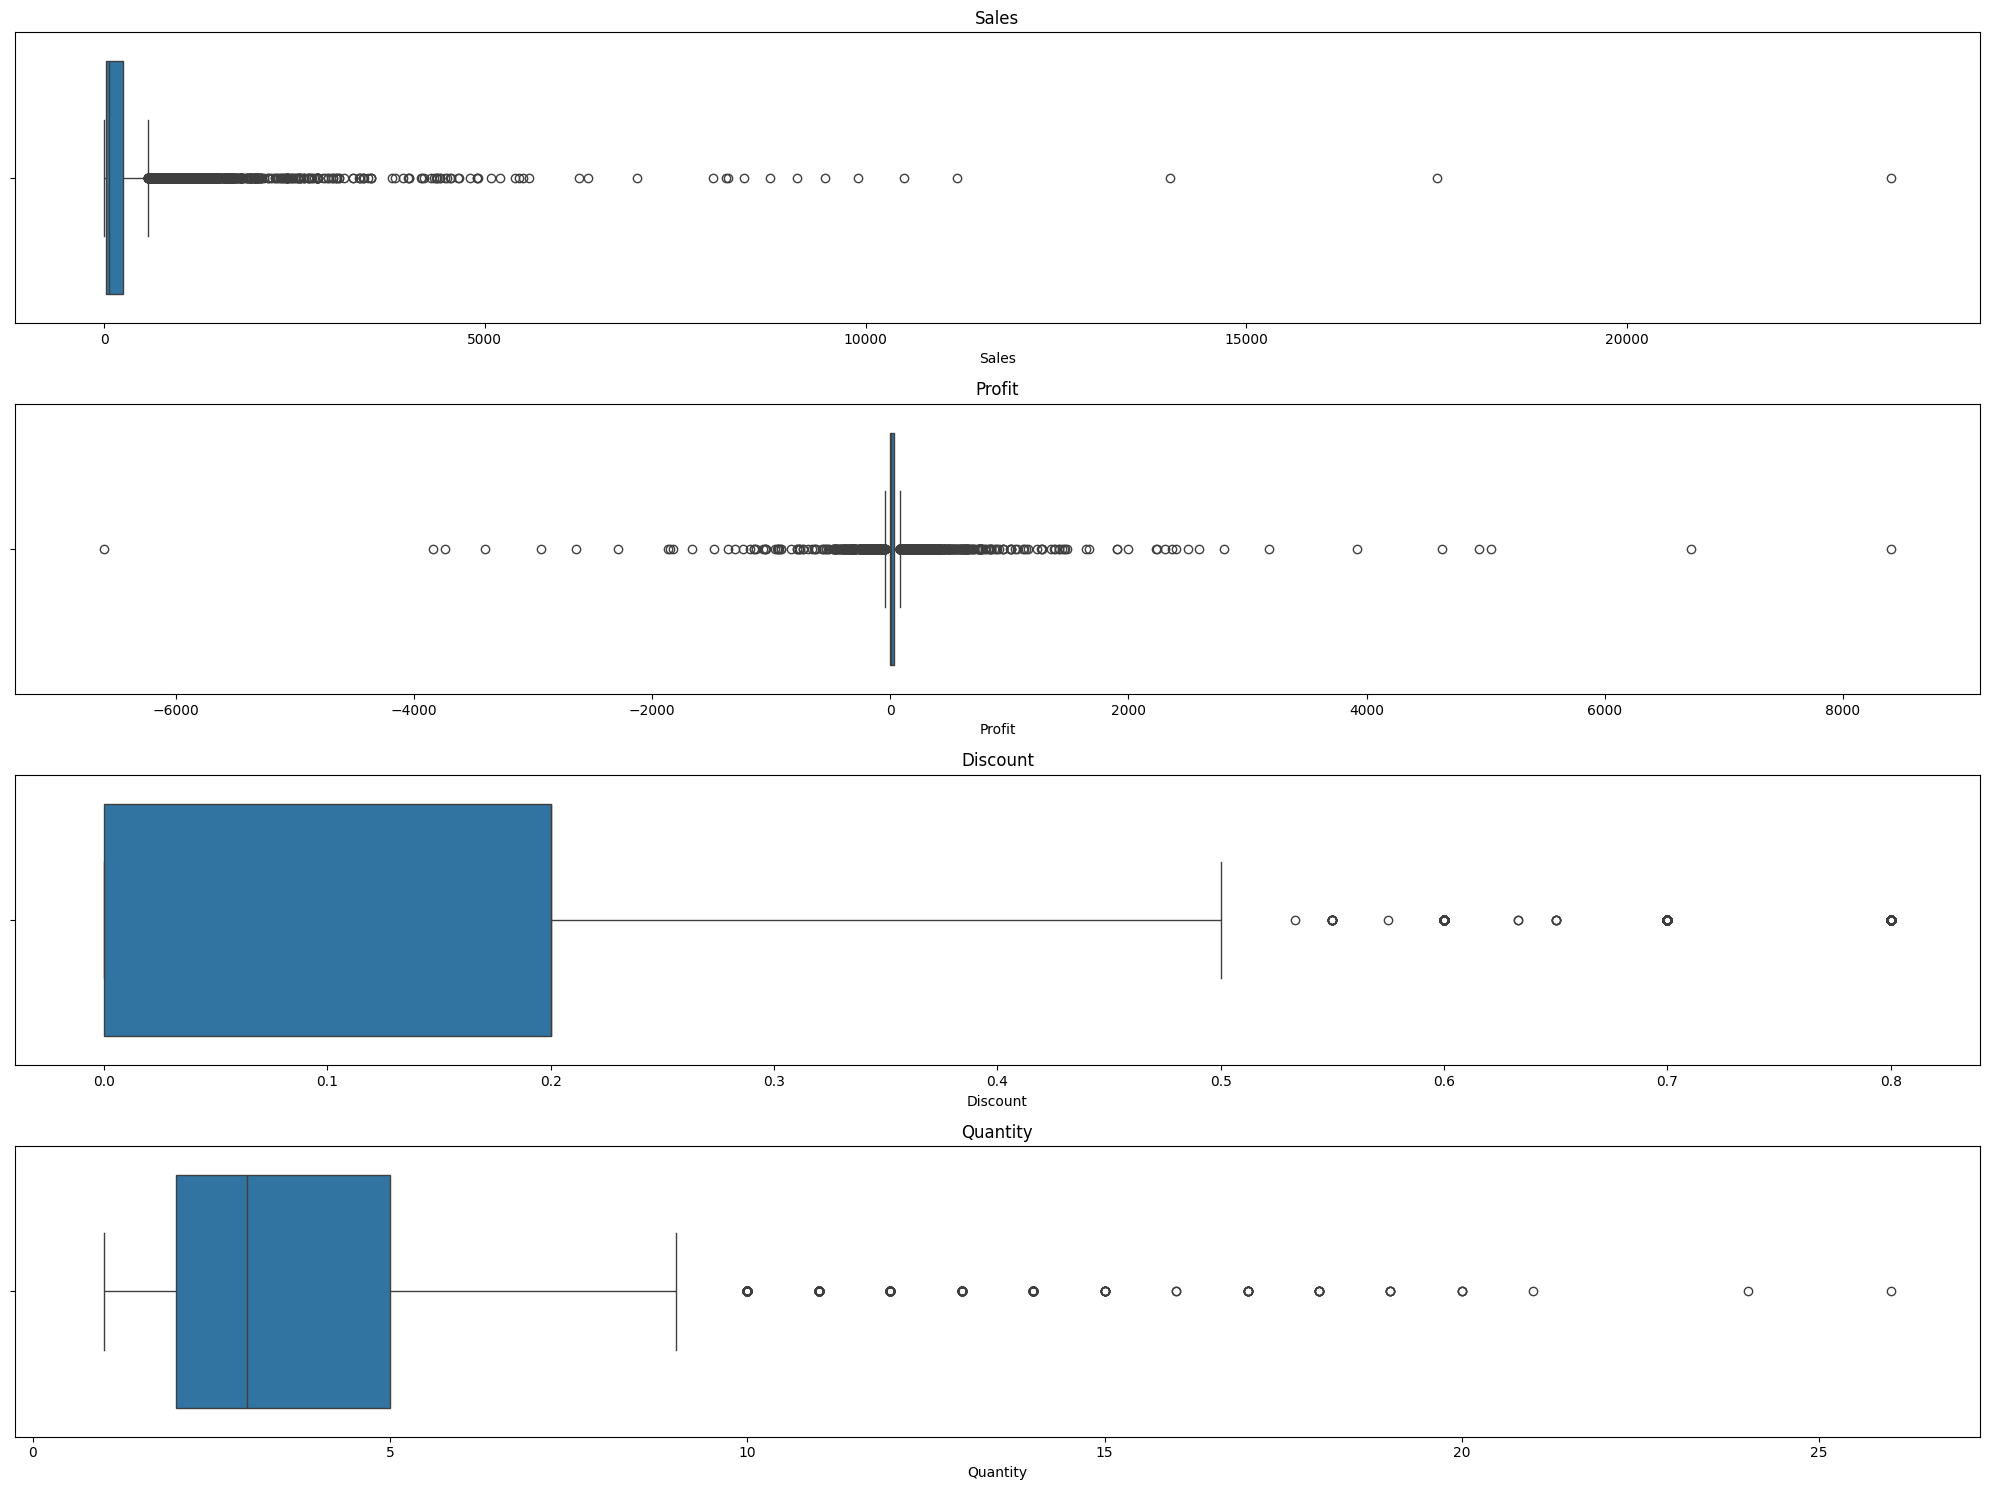

In [773]:
# Outliers
# Present Outliers with Box plot
feature = ['Sales', 'Profit', 'Discount', 'Quantity']
plt.figure(figsize=(20, 15))

for idx, col in enumerate(feature, start=1):
    plt.subplot(4, 1, idx)
    sns.boxplot(x=combined_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [774]:
# Dictionary to store outliers' information
outliers_info = {}

for column in ['Sales', 'Profit','Quantity', 'Discount']:
    # Calculate quartiles
    Q1 = combined_df[column].quantile(0.25)
    Q3 = combined_df[column].quantile(0.75)
    
    # Calculate IQR and bounds
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_condition = (combined_df[column] < lower_bound) | (combined_df[column] > upper_bound)
    outliers = combined_df[outliers_condition]

    # Count outliers
    num_outliers = outliers.shape[0]

    # Calculate percentage of outliers
    total_data_points = combined_df[column].shape[0]
    percentage_outliers = (num_outliers / total_data_points) * 100

    # Store information in the dictionary
    outliers_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'number_of_outliers': num_outliers,  # Count of outliers
        'percentage_of_outliers': percentage_outliers,  # Percentage of outliers
        'outliers_indices': outliers.index.tolist()  # Indices of outliers
    }

# Summary for outliers_summary
outliers_summary = {key: {'lower_bound': value['lower_bound'], 
                          'upper_bound': value['upper_bound'],
                          'number_of_outliers': value['number_of_outliers'],
                          'percentage_of_outliers': value['percentage_of_outliers']} 
                    for key, value in outliers_info.items()}

# Create DataFrame from 'outliers_summary'
outliers_summary_df = pd.DataFrame.from_dict(outliers_summary, orient='index')

# Display DataFrame as a styled table with all numerical values formatted to two decimal places
styled_table = outliers_summary_df.style.format({
    'lower_bound': '{:.2f}',
    'upper_bound': '{:.2f}',
    'number_of_outliers': '{}',
    'percentage_of_outliers': '{:.2f}%'
})
styled_table


,lower_bound,upper_bound,number_of_outliers,percentage_of_outliers
Sales,-313.19,573.83,1013,11.24%
Profit,-46.92,83.13,1651,18.32%
Quantity,-2.50,9.50,374,4.15%
Discount,-0.30,0.50,755,8.38%


There are numerous outliers in the data, with profits reaching up to 18%. However, it's essential to retain these outliers as they provide valuable insights into market dynamics. But we should avoid using the mean aggregation function in this EDA. Instead, we can rely on the median, which is robust against outliers, for subsequent analyses.


The insight from the data cleaning and anomaly detection process suggests that the provided dataset **lacks sufficient validity and consistency for performing complex and detailed calculations**. There are discrepancies within the data, and crucial information, such as the **meaning of unique values in the "license" column, is missing**. Without a clear understanding of the semantics behind the "license" values, such as whether they represent annual or monthly subscriptions, it is challenging to accurately group and analyze the data according to mathematical calculations. Thus, further clarification and refinement of the dataset, including the establishment of a comprehensive data dictionary, are necessary to ensure its suitability for robust data analysis and modeling tasks.

In the context of business data analysis, given the limitations identified in the data cleaning and anomaly detection process, it would be **prudent to focus on broader, more global calculations rather than overly complex ones**. Despite its shortcomings, the dataset still offers numerous insights that can be analyzed from a somewhat distant perspective. By adopting a more **holistic approach** to analysis, we can **extract valuable insights and trends that provide meaningful business intelligence**. This approach allows us to leverage the available data effectively while mitigating the risks associated with its inconsistencies and lack of detail.

## **Bussiness Data Analysis**

Price sensitivity reveal the intriguing correlation between consumer wallets and the perceived value of products. In a market where choices abound, understanding which products are highly responsive to price changes can be the key to strategic pricing decisions and staying ahead of the competition([www.symson.com](https://www.symson.com/blog/5-price-sensitivity-examples-and-identifying-price-sensitivity-drivers)).

**OBJECTIVE:**
How can we develop discount optimization strategies to maximize sales across our product portfolio?

1. What is the correlation between discount levels and quantity sold for each product?
2. Can we identify products that demonstrate a significant response to discounts compared to others?
3. What patterns emerge when comparing the impact of discounts on sensitive and insensitive products over time?
4. Can we identify specific regions to analyze products are particularly sensitive or insensitive to discounts?
5. What approaches can be implemented to optimize sensitive product discounts or reduce insensitive product discounts to maintain competitiveness of the sales?

**PROBLEM SCOPE:**

- The dataset under consideration spans the timeframe from 2020 to 2023.
- The analysis primarily focuses on Sales, Quantity, and Discount data, with minimal exploration of profitability due to limited information.
- Insights and prescriptive analysis will not involve machine learning techniques, as they are beyond the scope of this learning context.

In [775]:
df = combined_df

### Business Question 1

What is the correlation between discount levels and quantity sold for each product?

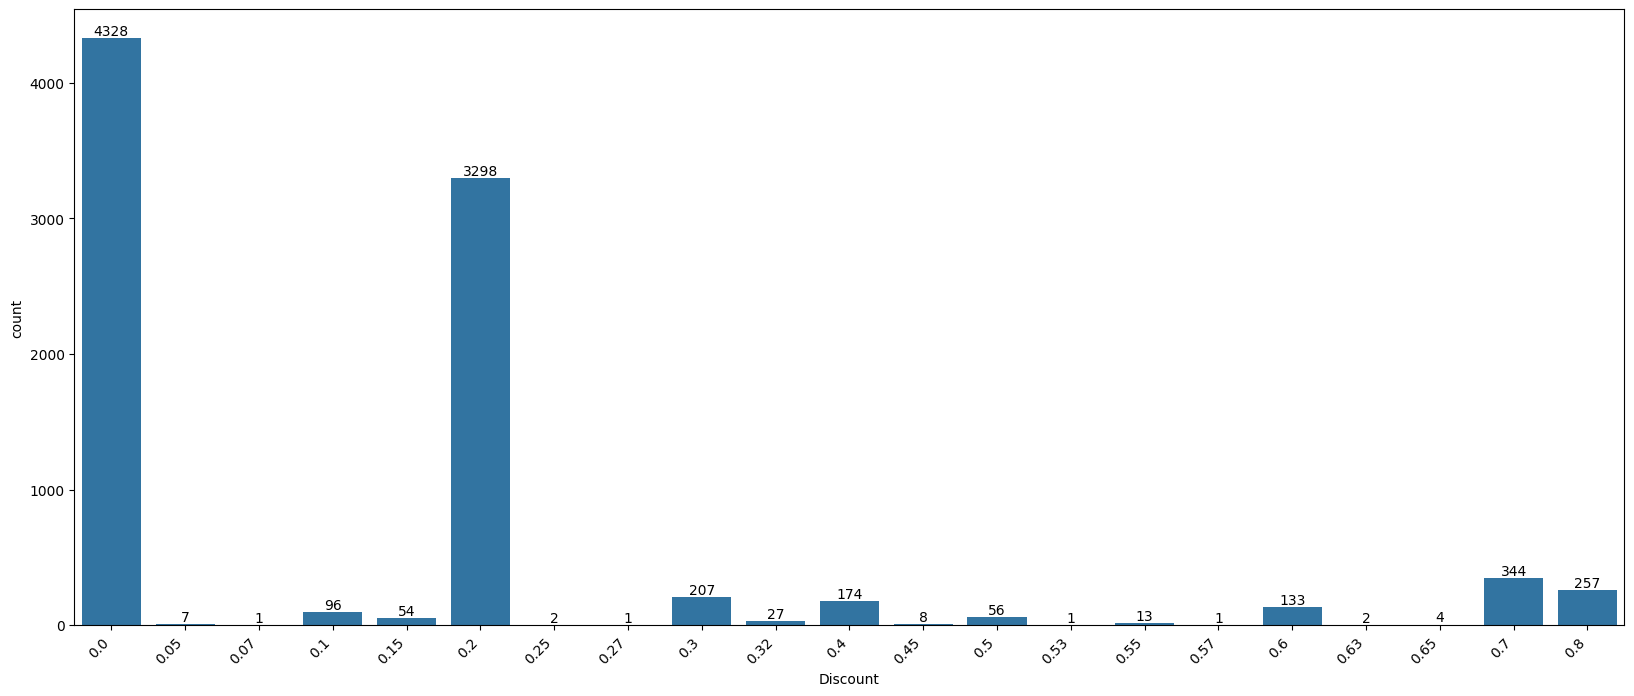

In [776]:
df['Discount'] = df['Discount'].apply(lambda x: round(x, 2))
df['Discount'].unique()
# Discount spread
plt.figure(figsize=(20, 8))
graph = sns.countplot(x='Discount', data=df)

# Format bar labels
for container in graph.containers:
    graph.bar_label(container)  # Format to two decimal points

# Format x-axis tick labels
plt.xticks(rotation=45, ha='right')
plt.show()


From the data above, we can observe the distribution of discount usage. The most commonly used discounts are 0.2, 0.7, and 0.8. It seems we need to categorize the usage of these discounts to analyze their distribution more effectively. We will use the evenly method to divide them.

In [777]:
def categorize_discount(discount):
    if discount == 0:
        return 'No Discount'
    elif 0 < discount <= 0.26:
        return 'Low Discount'
    elif 0.2 < discount <= 0.52:
        return 'Medium Discount'
    elif 0.5 < discount <= 8:
        return 'High Discount'
    else:
        return 'Unknown'

# Apply the categorization function to the Discount column
df['Discount Category'] = df['Discount'].apply(categorize_discount)
# Display the updated DataFrame
display(
df[['Discount', 'Discount Category']].head(2),
df.head(2))

,Discount,Discount Category
0,0.2,Low Discount
1,0.0,No Discount


,Order ID,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,License,Product,Sales,Quantity,Discount,Profit,Discount Category
0,AMER-2020-100090,2020-07-08,United States,Los Angeles,AMER,NAMER,Verizon Communications,Communications,Strategic,"4BEAB9UXKH, AVBMH39MTD",ContactMatcher,699.192,9,0.2,-19.0890,Low Discount
1,AMER-2020-100279,2020-03-10,Brazil,São Paulo,AMER,LATAM,Ford Motor,Manufacturing,SMB,NI5MITNJ98,Support,22.380,2,0.0,10.7424,No Discount


Before delving into data exploration, it's essential to understand its characteristics. Therefore, we'll utilize the Kruskal-Wallis test to assess more than two independent samples in non-parametric statistics.

Hypothesis:
<br>
Ho: The median sales for no discount = low discount = medium discount = high discount
<br>
Ha: At least one pair is not equal (and we don't know which one)

In [778]:
# Import Library
from scipy.stats import kruskal

# Kruskal wallis test
kruskal(df[df['Discount Category'] == 'No Discount']['Sales'],
        df[df['Discount Category'] == 'Low Discount']['Sales'],
        df[df['Discount Category'] == 'Medium Discount']['Sales'],
        df[df['Discount Category'] == 'High Discount']['Sales']
       )

KruskalResult(statistic=819.3664856852018, pvalue=2.7292073661707274e-177)

Conclusion: The p-value is lower than the significance level of 0.05, indicating sufficient evidence to reject the null hypothesis. Thus, at least one pair of population medians is not equal.

We can manually compare using pandas groupby. From the code results below, it's evident that the median sales for the medium discount group is higher than the other discount groups.

In [779]:
df.groupby(['Discount Category'])['Sales'].median()

Discount Category
High Discount       16.156
Low Discount        66.080
Medium Discount    344.372
No Discount         61.820
Name: Sales, dtype: float64

Indeed, it's evident that the median values are significantly different.

Next, we need to examine the correlation between the quantitative data that we will analyze.

**Spearman Correlation**:
Spearman correlation also has several assumptions. First, besides quantitative variables, the Spearman correlation test can also be used to explore variables with ordinal scales. Second, the relationship between two variables is non-linear (no straight line in the scatterplot). Finally, Spearman correlation is actually the non-parametric statistical version of Pearson correlation. In short, if the variables are quantitative and linear, but do not meet parametric requirements, Spearman correlation can be used.

In [780]:
df[['Sales','Quantity','Discount','Profit']].corr('spearman')

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.356920,-0.039908,0.519330
Quantity,0.356920,1.000000,0.007721,0.248049
Discount,-0.039908,0.007721,1.000000,-0.539477
Profit,0.519330,0.248049,-0.539477,1.000000


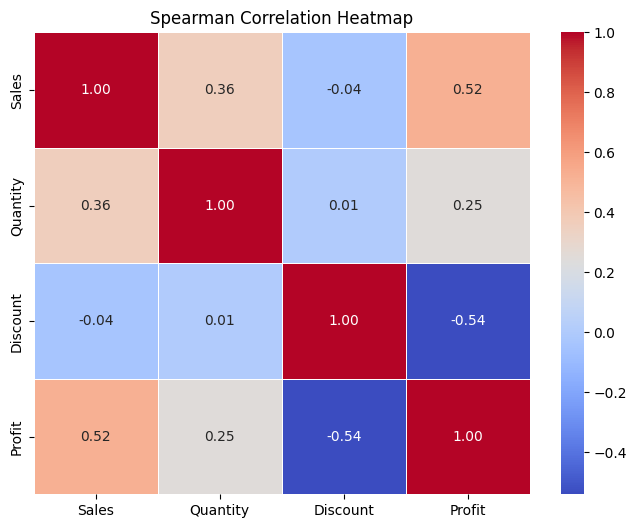

In [781]:
spearman_corr = df[['Sales','Quantity','Discount','Profit']].corr('spearman')

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [782]:
df

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,License,Product,Sales,Quantity,Discount,Profit,Discount Category
0,AMER-2020-100090,2020-07-08,United States,Los Angeles,AMER,NAMER,Verizon Communications,Communications,Strategic,"4BEAB9UXKH, AVBMH39MTD",ContactMatcher,699.192,9,0.2,-19.0890,Low Discount
1,AMER-2020-100279,2020-03-10,Brazil,São Paulo,AMER,LATAM,Ford Motor,Manufacturing,SMB,NI5MITNJ98,Support,22.380,2,0.0,10.7424,No Discount
2,AMER-2020-100363,2020-04-08,Chile,Santiago,AMER,LATAM,Carrefour,Retail,Strategic,0O2MCUTMFW,Storage,2.368,2,0.2,0.8288,Low Discount
3,AMER-2020-100363,2020-04-08,Chile,Santiago,AMER,LATAM,Carrefour,Retail,Strategic,7ZEJI08M1P,Support,19.008,3,0.2,6.8904,Low Discount
4,AMER-2020-100762,2020-11-24,Brazil,Rio de Janeiro,AMER,LATAM,HonHai Precision Industry,Tech,Strategic,9WNGMUMGIU,ChatBot Plugin,151.920,4,0.0,45.5760,No Discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,EMEA-2023-169929,2023-09-26,Netherlands,The Hague,EMEA,EU-WEST,Target,Retail,Strategic,QWY39JAWLQ,Marketing Suite - Gold,39.900,5,0.0,10.3740,No Discount
9010,EMEA-2023-169978,2023-12-25,United Kingdom,Manchester,EMEA,UKIR,Philip Morris International,Consumer Products,SMB,72ZYHWG94C,ContactMatcher,14.376,3,0.2,4.8519,Low Discount
9011,EMEA-2023-169978,2023-12-25,United Kingdom,Manchester,EMEA,UKIR,Philip Morris International,Consumer Products,SMB,X8PDHRO4CY,FinanceHub,271.764,2,0.1,48.3136,Low Discount
9012,EMEA-2023-169999,2023-06-20,United Kingdom,London,EMEA,UKIR,Daimler,Transportation,Strategic,5JIPT0BG1B,ContactMatcher,11.568,3,0.2,3.7596,Low Discount


We can observe that for the data we are investigating, the correlation between quantity and sales is relatively small. However, despite this, we need to delve deeper into this matter.

Alright, let's now delve deeper into everything related to discounts.

C:\Users\ivans\AppData\Local\Temp\ipykernel_1860\1499113431.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Discount Category', data=df, order=discount_order, ax=axs[0], palette='viridis')


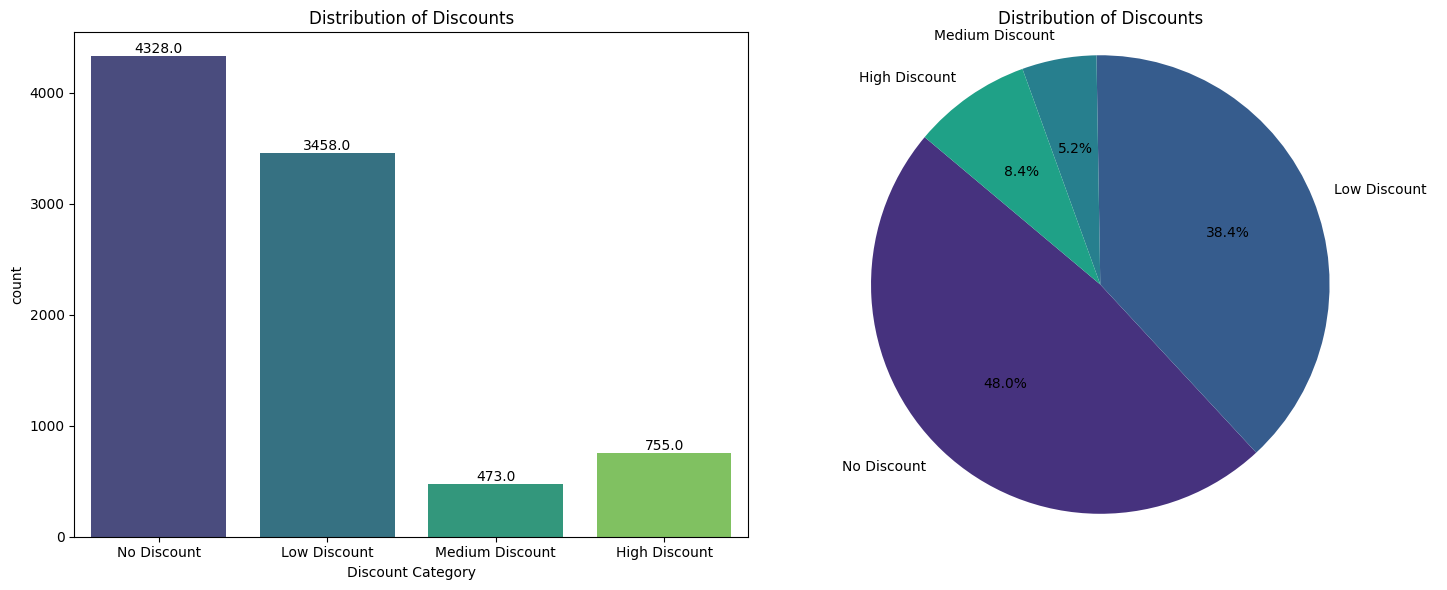

In [784]:

# Define the order of 'Discount Category'
discount_order = ['No Discount', 'Low Discount', 'Medium Discount', 'High Discount']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Countplot
sns.countplot(x='Discount Category', data=df, order=discount_order, ax=axs[0], palette='viridis')
axs[0].set_title('Distribution of Discounts')

# Add text annotations to the bars
for bar in axs[0].patches:
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', 
                ha='center', va='bottom')

# Pie chart
filtered_data = df['Discount Category'].value_counts()[discount_order]
axs[1].pie(filtered_data, labels=filtered_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
axs[1].set_title('Distribution of Discounts')

# Equal aspect ratio ensures that pie is drawn as a circle
axs[1].axis('equal')

plt.tight_layout()
plt.show()


Here are the transactions that utilize discounts and those that do not. Interestingly, the usage of discounts is more prevalent compared to transactions without discounts, with a ratio of 52% to 48%.

C:\Users\ivans\AppData\Local\Temp\ipykernel_1860\1335813372.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount Category', y='Quantity', data=grouped_data, palette='viridis')


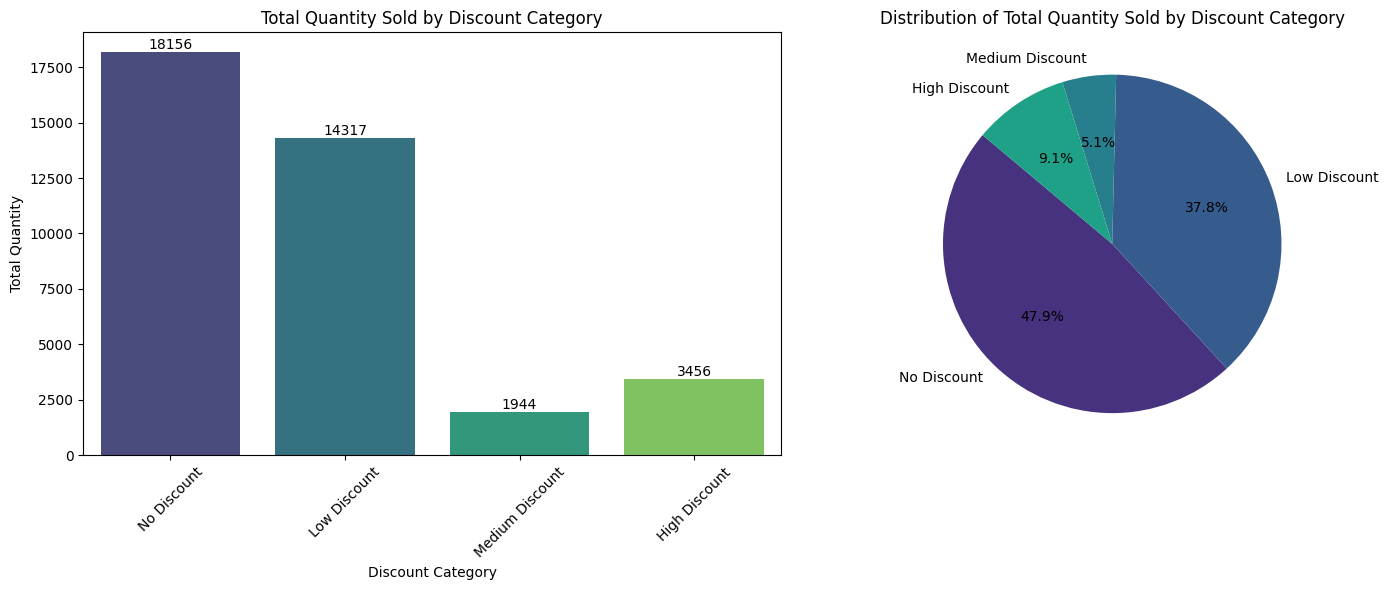

In [785]:
# Define the order of 'Discount Category'
discount_order = ['No Discount', 'Low Discount', 'Medium Discount', 'High Discount']

# Group data by 'Discount Category' and calculate total quantity for each category
grouped_data = df.groupby('Discount Category')['Quantity'].sum().reindex(discount_order).reset_index()

# Plot
plt.figure(figsize=(15, 6))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(x='Discount Category', y='Quantity', data=grouped_data, palette='viridis')
plt.title('Total Quantity Sold by Discount Category')
plt.xlabel('Discount Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)

# Add text annotations to the bars
for index, row in grouped_data.iterrows():
    plt.text(index, row['Quantity'], f'{row["Quantity"]}', ha='center', va='bottom')

# Pie plot
plt.subplot(1, 2, 2)
plt.pie(grouped_data['Quantity'], labels=grouped_data['Discount Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribution of Total Quantity Sold by Discount Category')

plt.tight_layout()
plt.show()


Looking at the quantity, it's also higher when using discounts compared to transactions without discounts, with a ratio of 52.1% to 47.9%.

In [786]:
grouped = df.groupby('Discount Category').agg(
    Total_Quantity=('Quantity', 'sum'),
    Frequency=('Discount Category', 'size'),
).reset_index()
grouped['Average'] = (grouped['Total_Quantity']/grouped['Frequency'])
grouped

,Discount Category,Total_Quantity,Frequency,Average
0,High Discount,3456,755,4.577483
1,Low Discount,14317,3458,4.140254
2,Medium Discount,1944,473,4.109937
3,No Discount,18156,4328,4.195009


This is the average quantity per transaction. It can be seen that transactions with high discounts have the highest average quantity purchased per transaction. This demonstrates that high discounts have a significant impact.

### Business Question 2

Can we identify products that demonstrate a significant response to discounts compared to others?

**Product Dictionary**


**1. Marketing Suite**
- *Description*: Amazon Pinpoint is a flexible and scalable outbound and inbound marketing communications service. It helps you understand user behavior, define which users to target, determine which messages to send, schedule the best time to deliver the messages, and then track the results of your campaign.
- *AWS Service*: [Amazon Pinpoint](https://aws.amazon.com/pinpoint/)

**2. FinanceHub**
- *Description*: AWS offers a range of solutions to help financial services customers quickly deliver new digital experiences, modernize core systems, and manage risk, compliance, and security in the cloud.
- *AWS Service*: AWS [Financial Services](https://aws.amazon.com/financial-services/)

**3. ContactMatcher**
- *Description*: Amazon Connect is an easy-to-use omnichannel cloud contact center that helps companies provide superior customer service at a lower cost. It enables companies to set up and manage a contact center in minutes, integrate it with existing systems, and deliver personalized customer experiences across various channels.
- *AWS Service*: [Amazon Connect](https://aws.amazon.com/connect/)

**4. SaaS Connector Pack**
- *Description*: AWS AppFlow is a fully managed integration service that enables you to securely transfer data between AWS services and SaaS applications like Salesforce, ServiceNow, Slack, and more, in just a few clicks. It allows you to automate data transfers without writing any code, monitor data flows in real-time, and maintain data integrity and compliance.
- *AWS Service*: [AWS AppFlow](https://aws.amazon.com/appflow/)

**5. ChatBot Plugin**
- *Description*: Amazon Lex is a service for building conversational interfaces into any application using voice and text. Powered by the same conversational engine as Alexa, Amazon Lex provides high-quality speech recognition and language understanding capabilities, enabling the addition of sophisticated, natural language "chatbots" to new and existing applications.
- *AWS Service*: [Amazon Lex](https://aws.amazon.com/lex/)

**6. Site Analytics**
- *Description*: Amazon QuickSight is a fast, cloud-powered business intelligence service that makes it easy to deliver insights to everyone in your organization. QuickSight lets you create and publish interactive dashboards that include ML Insights, enabling you to make data-driven decisions and share insights with stakeholders.
- *AWS Service*: [Amazon QuickSight](https://aws.amazon.com/quicksight/)

**7. OneView**
- *Description*: AWS Control Tower offers the easiest way to set up and govern a secure, multi-account AWS environment based on AWS best practices. With AWS Control Tower, you don’t have to worry about managing IAM permissions, VPC design, or monitoring and logging configurations, as AWS Control Tower provides pre-packaged governance rules for security, operations, and compliance.
- *AWS Service*: [AWS Control Tower](https://aws.amazon.com/controltower/)

**8. Support**
- *Description*: AWS Support Plans range from Basic to Enterprise, offering different levels of support to help you get the most out of your AWS solutions. Basic Support is free and includes access to the AWS Trusted Advisor tool and documentation. Developer, Business, and Enterprise Support plans offer varying levels of technical assistance to meet your specific needs.
- *AWS Service*: [AWS Support Plans](https://aws.amazon.com/premiumsupport/plans/)

**9. Data Smasher**
- *Description*: AWS Glue is a fully managed extract, transform, and load (ETL) service that makes it easy to prepare and load data for analytics. Glue is a serverless service that prepares data for analysis by automatically discovering, cataloging, cleaning, and transforming your data.
- *AWS Service*: [AWS Glue](https://aws.amazon.com/glue/)

**10. Storage**
- *Description*: Amazon Simple Storage Service (Amazon S3) is an object storage service that offers industry-leading scalability, data availability, security, and performance. This means customers of all sizes and industries can use it to store and protect any amount of data for a range of use cases, such as websites, mobile applications, backup and restore, archive, enterprise applications, IoT devices, and big data analytics.
- *AWS Service*: [Amazon S3](https://aws.amazon.com/s3/)

**11. Big Ol Database**
- *Description*: Amazon Redshift is a fully managed, petabyte-scale data warehouse service in the cloud. You can start with just a few hundred gigabytes of data and scale to a petabyte or more, as your needs change. This enables you to use your data to acquire new insights for your business and customers.
- *AWS Service*: [Amazon Redshift](https://aws.amazon.com/redshift/)

**12. Alchemy**
- *Description*: AWS Glue DataBrew is a visual data preparation tool that makes it easy for data analysts and data scientists to clean and normalize data to prepare it for analytics and machine learning. With DataBrew, you can visually explore, clean, and transform data without writing code, and then publish it for analysis in minutes.
- *AWS Service*: [AWS Glue DataBrew](https://aws.amazon.com/glue/databrew/)

**13. SaaS Connector Pack - Gold**
- *Description*: Typically, this would be a premium version of the SaaS Connector Pack with additional features and support.
- *AWS Service*: No specific AWS service provided. This may be a premium offering or customization of existing AWS services.

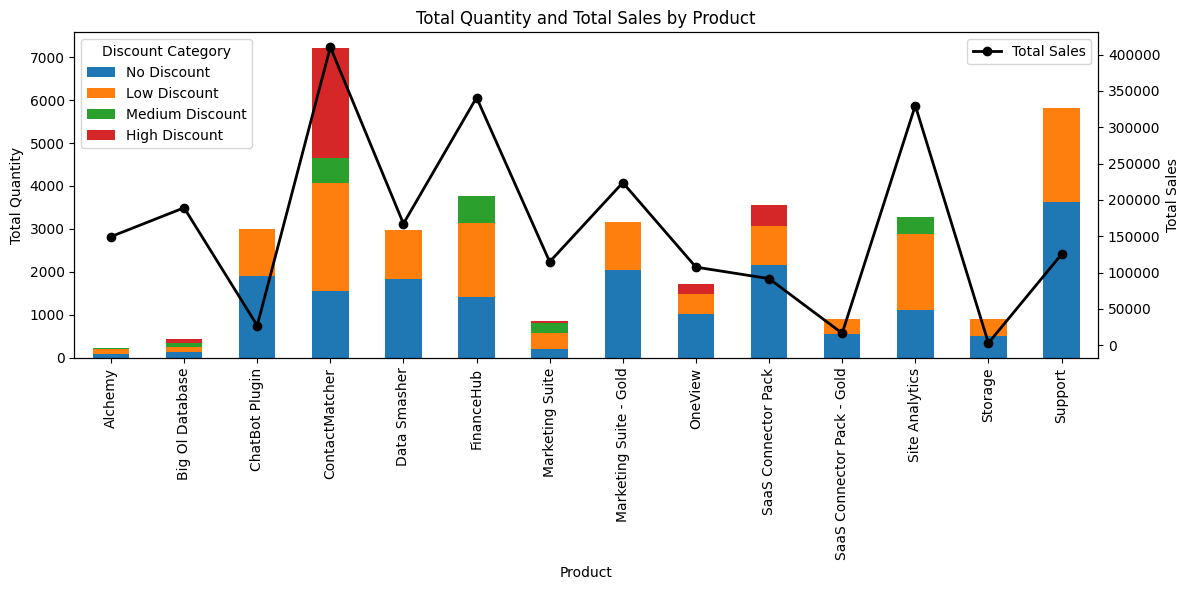

In [787]:
# Group by product and discount category, and sum the quantity of transactions for the discounted DataFrame
grouped_quantity = df.groupby(['Product', 'Discount Category'])['Quantity'].sum().unstack(fill_value=0)

# Add 'No Discount' category to the DataFrame and fill missing values with 0
grouped_quantity = grouped_quantity[['No Discount', 'Low Discount', 'Medium Discount', 'High Discount']]

# Sample total sales data (replace with your actual total sales data)
total_sales = df.groupby('Product')['Sales'].sum()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot frequency of transactions (quantity)
grouped_quantity.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Total Quantity')

# Create a secondary y-axis for total sales
ax2 = ax1.twinx()
ax2.plot(total_sales.index, total_sales.values, color='black', marker='o', linestyle='-', linewidth=2, label='Total Sales')
ax2.set_ylabel('Total Sales')

# Adjust legends
ax1.legend(title='Discount Category', loc='upper left')
ax2.legend(loc='upper right')

# Add title and labels
plt.title('Total Quantity and Total Sales by Product')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Alright, it seems we have an overview of products that frequently use discounts and those that do not. However, we need to delve deeper into this analysis.

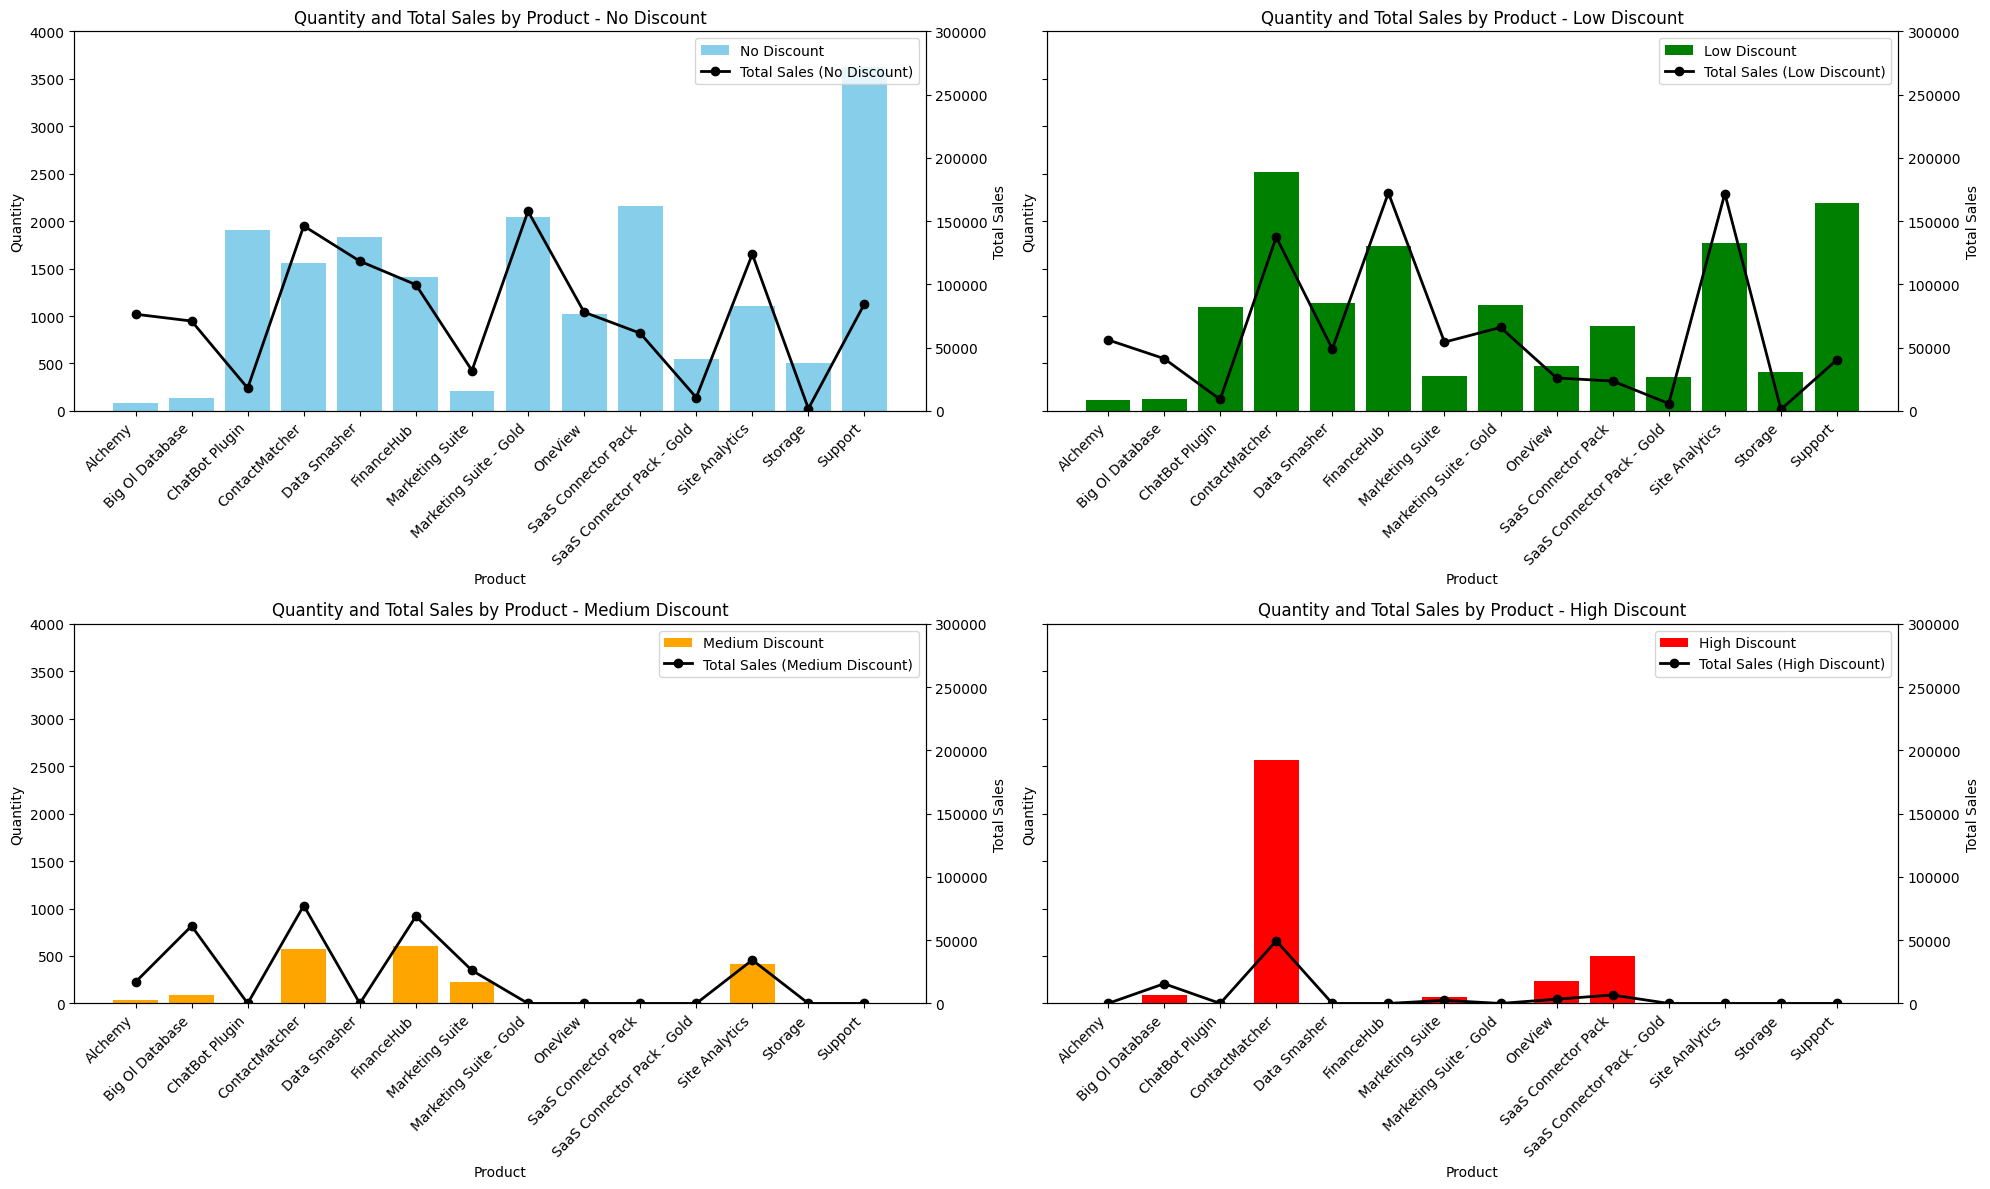

In [788]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame containing the required data

# Group by product and discount category, and sum the quantity of transactions for the discounted DataFrame
grouped_quantity = df.groupby(['Product', 'Discount Category'])['Quantity'].sum().unstack(fill_value=0)

# Add 'No Discount' category to the DataFrame and fill missing values with 0
grouped_quantity = grouped_quantity[['No Discount', 'Low Discount', 'Medium Discount', 'High Discount']]

# Get the list of products
products = grouped_quantity.index

# Set the x-axis tick positions and labels
x = np.arange(len(products))

# Define a color palette for each discount category
colors = ['skyblue', 'green', 'orange', 'red']

# Create a figure with multiple subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(20, 12), sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plotting for each discount category
for idx, discount_category in enumerate(grouped_quantity.columns):
    ax1 = axes[idx]

    # Plot frequency of transactions (quantity) for the current discount category with different color
    ax1.bar(x, grouped_quantity[discount_category], color=colors[idx], label=discount_category)

    # Set x-axis tick positions and labels
    ax1.set_xticks(x)
    ax1.set_xticklabels(products, rotation=45, ha='right')

    ax1.set_ylabel('Quantity')
    ax1.set_xlabel('Product')

    # Calculate total sales for the current discount category
    total_sales = df[df['Discount Category'] == discount_category].groupby('Product')['Sales'].sum()

    # Plot total sales on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(x, total_sales.reindex(products, fill_value=0), color='black', marker='o', linestyle='-', linewidth=2, label=f'Total Sales ({discount_category})')
    ax2.set_ylabel('Total Sales')

    # Adjust legends
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    ax1.set_ylim(0, 4000)
    ax2.set_ylim(0, 300000)

    # Add title
    ax1.set_title(f'Quantity and Total Sales by Product - {discount_category}')

plt.tight_layout()
plt.show()


In [789]:
contact = df[df['Product']=='ContactMatcher']
contact[contact['Discount Category']=='Medium Discount']

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,License,Product,Sales,Quantity,Discount,Profit,Discount Category
91,AMER-2020-108609,2020-10-31,Mexico,Mexico City,AMER,LATAM,Airbus,Manufacturing,Strategic,BMQFOPNH2H,ContactMatcher,1421.664,8,0.40,-734.5264,Medium Discount
185,AMER-2020-117380,2020-03-28,Mexico,Toluca,AMER,LATAM,Caterpillar,Manufacturing,Enterprise,KZ5FO4X8S4,ContactMatcher,330.588,1,0.40,-143.2548,Medium Discount
218,AMER-2020-121769,2020-04-08,Mexico,Cancun,AMER,LATAM,American Express,Finance,SMB,CKN6MELW20,ContactMatcher,172.110,1,0.40,-94.6605,Medium Discount
228,AMER-2020-123519,2020-12-14,Mexico,Mexico City,AMER,LATAM,Comcast,Communications,SMB,KM2LQK0IT8,ContactMatcher,136.530,1,0.40,-52.3365,Medium Discount
362,AMER-2020-138177,2020-09-19,Chile,Santiago,AMER,LATAM,Volkswagen,Manufacturing,Strategic,ZX7UMWDFXV,ContactMatcher,73.915,1,0.50,-45.8273,Medium Discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,EMEA-2023-149888,2023-11-08,France,Paris,EMEA,EU-WEST,Prudential Financial,Finance,SMB,502A5V1CHD,ContactMatcher,350.352,4,0.40,-140.1408,Medium Discount
8658,EMEA-2023-150910,2023-12-23,South Africa,Johannesburg,EMEA,MEA,Comcast,Communications,SMB,3M6UIM5LA7,ContactMatcher,934.956,6,0.40,-249.3216,Medium Discount
8762,EMEA-2023-157987,2023-09-03,United Kingdom,London,EMEA,UKIR,Samsung Electronics,Tech,Strategic,"3NZNWFKW2Y, 33KWTBDCNC",ContactMatcher,280.958,9,0.30,-84.4054,Medium Discount
8794,EMEA-2023-159100,2023-10-17,South Africa,Johannesburg,EMEA,MEA,Bosch,Tech,Strategic,DRIA9RT1YE,ContactMatcher,1875.258,7,0.40,-968.8833,Medium Discount


We can observe that:

Products like **ContactMatcher, Marketing Suite, and Site Analytics exhibit sensitivity to discounts**, as there is an increase in sales quantity when discounts are applied.
<br>
Products such as **Support, OneView, and Marketing Suite Gold appear to be less sensitive to discounts**, as evidenced by the lack of significant increase in sales despite the application of discounts.
Next, we will take a sample of ContactMatcher as an assumption that it is sensitive to discounts, and OneView as not sensitive to discounts.

### Business Question 3

What patterns emerge when comparing the impact of discounts on sensitive and insensitive products over time?

We need to create a "month year" column to be used for time-related analysis.

In [790]:
# Convert 'Order Date' to datetime if not already in datetime format
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'])

# Extract month and year from 'Order Date'
combined_df['Month'] = combined_df['Order Date'].dt.strftime('%B')
combined_df['Year'] = combined_df['Order Date'].dt.year

# Extract quarter from 'Order Date'
combined_df['Quarter'] = combined_df['Order Date'].dt.quarter

# Create 'Month_Year' by concatenating 'Month' and 'Year'
combined_df['Month_Year'] = combined_df['Month'] + ' ' + combined_df['Year'].astype(str)

# Create 'Quarter_Year' by concatenating 'Quarter' and 'Year'
combined_df['Quarter_Year'] = 'Q' + combined_df['Quarter'].astype(str) + ' ' + combined_df['Year'].astype(str)

# Display the DataFrame with the new columns
combined_df.head(2)


,Order ID,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,License,Product,Sales,Quantity,Discount,Profit,Discount Category,Month,Year,Quarter,Month_Year,Quarter_Year
0,AMER-2020-100090,2020-07-08,United States,Los Angeles,AMER,NAMER,Verizon Communications,Communications,Strategic,"4BEAB9UXKH, AVBMH39MTD",ContactMatcher,699.192,9,0.2,-19.0890,Low Discount,July,2020,3,July 2020,Q3 2020
1,AMER-2020-100279,2020-03-10,Brazil,São Paulo,AMER,LATAM,Ford Motor,Manufacturing,SMB,NI5MITNJ98,Support,22.380,2,0.0,10.7424,No Discount,March,2020,1,March 2020,Q1 2020


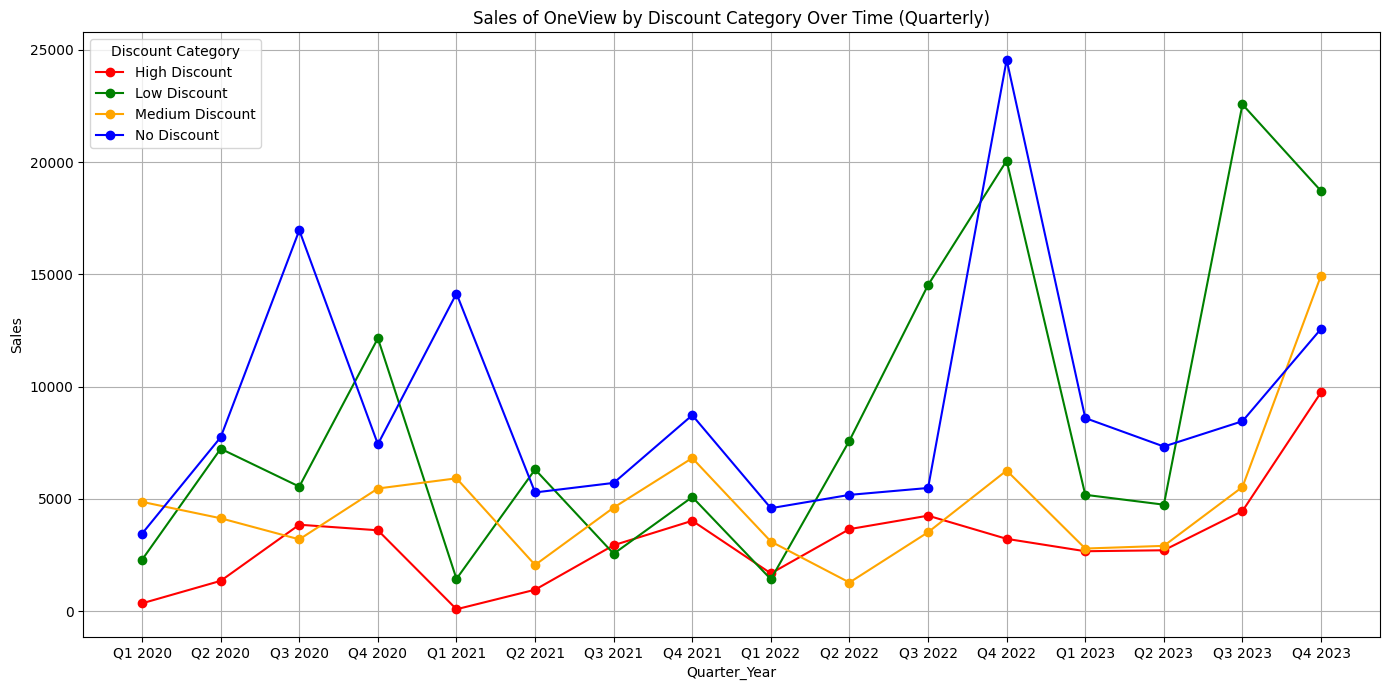

In [791]:
# Filter the data to include only the product "OneView"
contact_matcher_data = df[df['Product'] == 'ContactMatcher']

# Group the data by 'Year' and 'Quarter' and 'Discount Category', and sum the sales for each quarter
quarterly_sales = contact_matcher_data.groupby(['Year', 'Quarter', 'Discount Category'])['Sales'].sum().unstack(fill_value=0)

# Combine 'Year' and 'Quarter' to form 'Quarter_Year' as a string
quarterly_sales.index = quarterly_sales.index.map(lambda x: f"Q{x[1]} {x[0]}")

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each discount category with specified colors
colors = {'No Discount': 'blue', 'Low Discount': 'green', 'Medium Discount': 'orange', 'High Discount': 'red'}
for discount_category in quarterly_sales.columns:
    ax.plot(quarterly_sales.index, quarterly_sales[discount_category], marker='o', linestyle='-', color=colors.get(discount_category, 'black'), label=discount_category)

# Add labels, title, and legend
ax.set_xlabel('Quarter_Year')
ax.set_ylabel('Sales')
ax.set_title('Sales of OneView by Discount Category Over Time (Quarterly)')
ax.legend(title='Discount Category')
ax.grid(True)

plt.tight_layout()
plt.show()


In [792]:
sales_by_discount = df[df['Product']=='ContactMatcher']
sales_by_discount = sales_by_discount.groupby('Discount Category')['Sales'].sum()

# Calculate total sales for transactions with no discount
total_sales_no_discount = sales_by_discount.loc['No Discount']

# Calculate total sales for transactions with low, medium, and high discounts
total_sales_with_discount = sales_by_discount.drop('No Discount').sum()

# Display the total sales
print("Total Sales with No Discount:", total_sales_no_discount)
print("Total Sales with Discount (Low, Medium, High):", total_sales_with_discount)

Total Sales with No Discount: 146197.37
Total Sales with Discount (Low, Medium, High): 264180.895


From the graph above, we can see that the usage of discounts is quite extensive and exhibits certain peaks. Interestingly, even when combining transactions with and without discounts, the total sales are higher when discounts are applied.

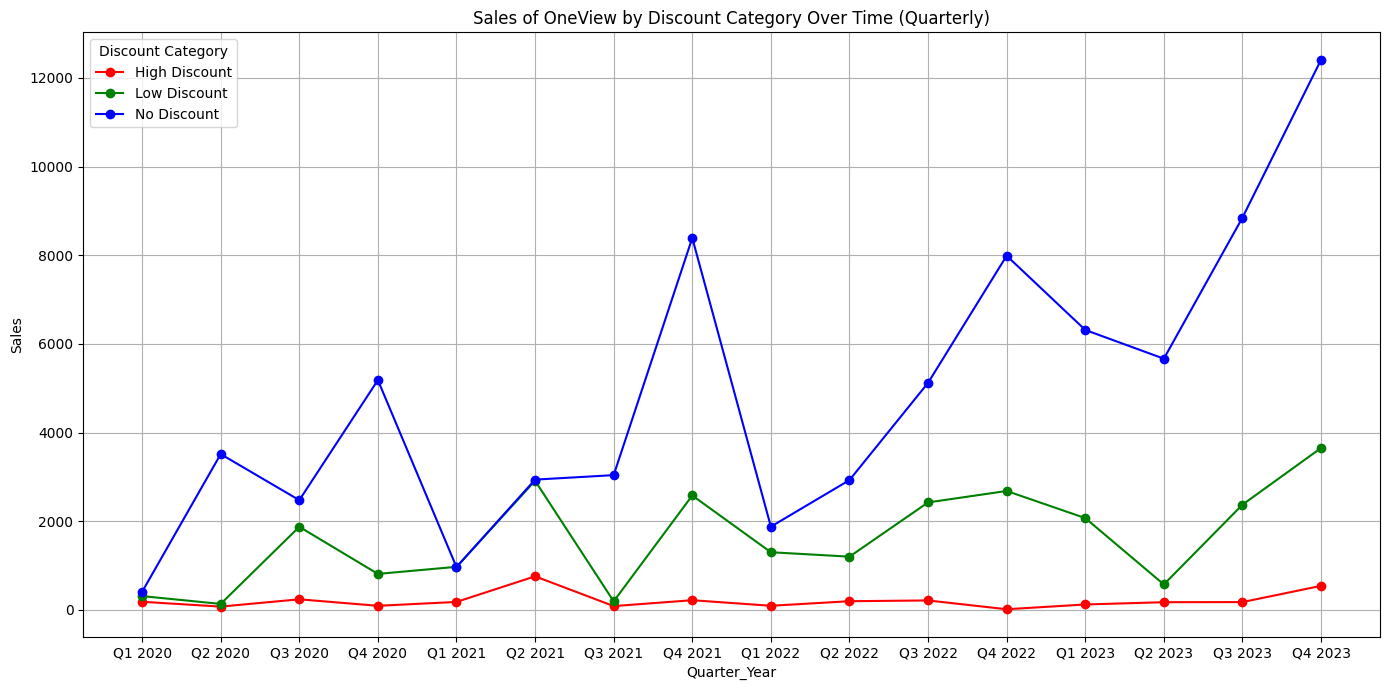

In [793]:
# Filter the data to include only the product "OneView"
oneview_data = df[df['Product'] == 'OneView']

# Group the data by 'Year' and 'Quarter' and 'Discount Category', and sum the sales for each quarter
quarterly_sales = oneview_data.groupby(['Year', 'Quarter', 'Discount Category'])['Sales'].sum().unstack(fill_value=0)

# Combine 'Year' and 'Quarter' to form 'Quarter_Year' as a string
quarterly_sales.index = quarterly_sales.index.map(lambda x: f"Q{x[1]} {x[0]}")

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each discount category with specified colors
colors = {'No Discount': 'blue', 'Low Discount': 'green', 'Medium Discount': 'orange', 'High Discount': 'red'}
for discount_category in quarterly_sales.columns:
    ax.plot(quarterly_sales.index, quarterly_sales[discount_category], marker='o', linestyle='-', color=colors.get(discount_category, 'black'), label=discount_category)

# Add labels, title, and legend
ax.set_xlabel('Quarter_Year')
ax.set_ylabel('Sales')
ax.set_title('Sales of OneView by Discount Category Over Time (Quarterly)')
ax.legend(title='Discount Category')
ax.grid(True)

plt.tight_layout()
plt.show()


In [794]:
sales_by_discount = df[df['Product']=='OneView']
sales_by_discount = sales_by_discount.groupby('Discount Category')['Sales'].sum()

# Calculate total sales for transactions with no discount
total_sales_no_discount = sales_by_discount.loc['No Discount']

# Calculate total sales for transactions with low, medium, and high discounts
total_sales_with_discount = sales_by_discount.drop('No Discount').sum()

# Display the total sales
print("Total Sales with No Discount:", total_sales_no_discount)
print("Total Sales with Discount (Low, Medium, High):", total_sales_with_discount)

Total Sales with No Discount: 78066.19
Total Sales with Discount (Low, Medium, High): 29465.970999999998


From the graph above, it can be observed that discounts do not have a significant impact. Hence, we can assume that OneView is insensitive to discounts. However, we need to delve a bit deeper by comparing its performance across different countries.

### Business Question 4

Can we identify specific regions to analyze products are particularly sensitive or insensitive to discounts?

Sales percentage is the percentage of sales after applying a discount, calculated as:

Sales Percentage=1−Discount

In [795]:
df['Sales Percentage'] = 1-df['Discount']
df.head(2)

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,License,Product,Sales,Quantity,Discount,Profit,Discount Category,Month,Year,Quarter,Month_Year,Quarter_Year,Sales Percentage
0,AMER-2020-100090,2020-07-08,United States,Los Angeles,AMER,NAMER,Verizon Communications,Communications,Strategic,"4BEAB9UXKH, AVBMH39MTD",ContactMatcher,699.192,9,0.2,-19.0890,Low Discount,July,2020,3,July 2020,Q3 2020,0.8
1,AMER-2020-100279,2020-03-10,Brazil,São Paulo,AMER,LATAM,Ford Motor,Manufacturing,SMB,NI5MITNJ98,Support,22.380,2,0.0,10.7424,No Discount,March,2020,1,March 2020,Q1 2020,1.0



Let's take a look at the top 10 countries with the highest sales for comparison.

C:\Users\ivans\AppData\Local\Temp\ipykernel_1860\774054753.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(profit_by_country.index, rotation=90)


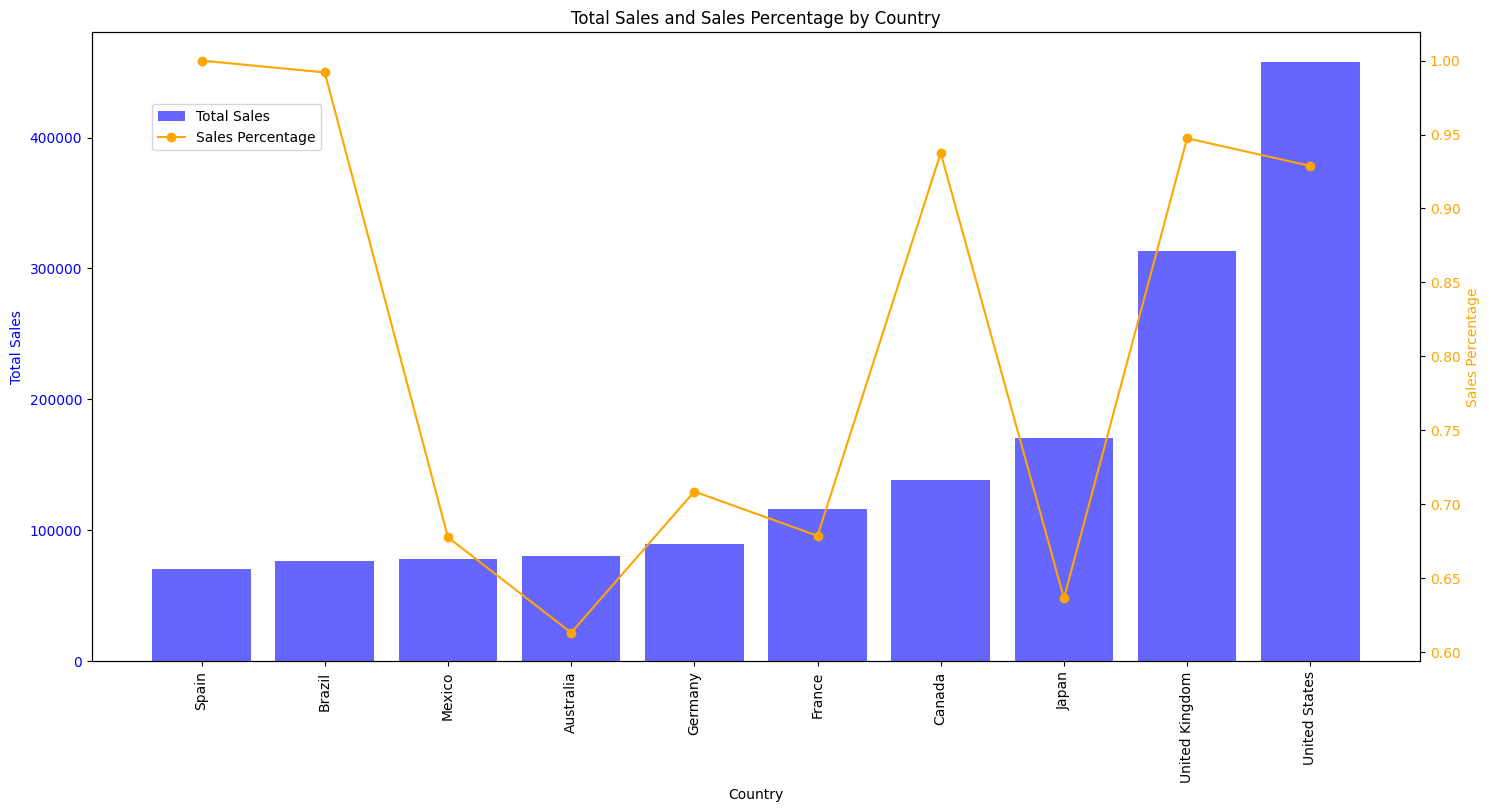

In [796]:
# Sum the profit and calculate the average sales percentage by region
profit_by_country = df.groupby('Country')['Sales'].sum().sort_values().tail(10)
sales_percentage_by_country = df.groupby('Country')['Sales Percentage'].mean()

# Align sales_percentage_by_country with the sorted order of profit_by_country
sales_percentage_by_country = sales_percentage_by_country.loc[profit_by_country.index]

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot total profit by country
ax1.bar(profit_by_country.index, profit_by_country, alpha=0.6, color='blue', label='Total Sales')
ax1.set_xlabel('Country')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(profit_by_country.index, rotation=90)

# Create a second y-axis for the sales percentage
ax2 = ax1.twinx()
ax2.plot(sales_percentage_by_country.index, sales_percentage_by_country, color='orange', marker='o', label='Sales Percentage')
ax2.set_ylabel('Sales Percentage', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adding legends
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.title('Total Sales and Sales Percentage by Country')
plt.show()

We can see that the United States has a good sales percentage, which places it at the top of the highest sales ranking. In the second place, we have our target country. However, Japan has a considerably high total sales, ranking third, but with a sales percentage below 65%, indicating that Japan offers many discounts for its products. We need to further investigate the usage of discounts in other countries for comparison purposes.

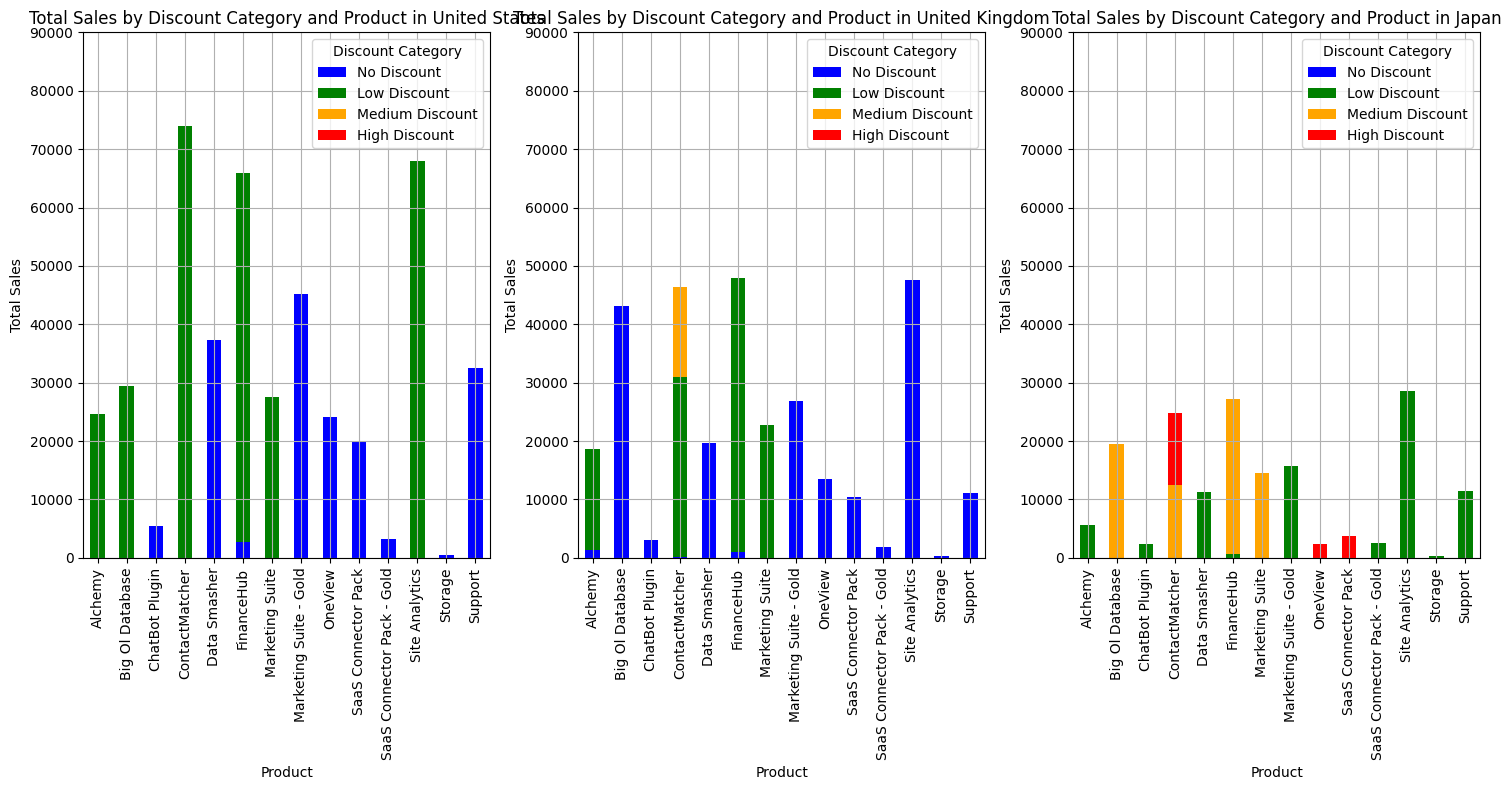

In [797]:
# Define the list of countries
selected_countries = ['United States', 'United Kingdom', 'Japan']

# Define color mapping for each discount category
color_mapping = {
    'No Discount': 'blue',
    'Low Discount': 'green',
    'Medium Discount': 'orange',
    'High Discount': 'red'
}

# Create subplots with 1 row and the number of columns equal to the number of selected countries
num_countries = len(selected_countries)
fig, axes = plt.subplots(1, num_countries, figsize=(5*num_countries, 8))

# Iterate over the selected countries
for i, Country in enumerate(selected_countries):
    # Filter the DataFrame for the current Country
    df_Subregion = df[df['Country'] == Country]
    
    # Group by product and discount category, and calculate the total sales for each product
    total_sales = df_Subregion.groupby(['Product', 'Discount Category'])['Sales'].sum().unstack(fill_value=0)
    
    # Ensure all discount categories are included in the DataFrame
    for category in ['No Discount', 'Low Discount', 'Medium Discount', 'High Discount']:
        if category not in total_sales.columns:
            total_sales[category] = 0
    
    # Sort the columns to ensure 'No Discount' is at the bottom
    total_sales = total_sales[['No Discount', 'Low Discount', 'Medium Discount', 'High Discount']]
    
    # Plotting on the current subplot with custom colors
    ax = total_sales.plot(kind='bar', stacked=True, ax=axes[i], color=[color_mapping[category] for category in total_sales.columns])
    ax.set_xlabel('Product')
    ax.set_ylabel('Total Sales')
    ax.set_title(f'Total Sales by Discount Category and Product in {Country}')
    ax.legend(title='Discount Category')
    ax.set_xticklabels(total_sales.index, rotation=90)
    ax.grid(True)
    ax.set_ylim(0, 90000)
    plt.tight_layout()

# Show the plots
plt.show()


From the three countries actively using discounts, let's now take a look at the ContactMatcher and OneView products in those countries.

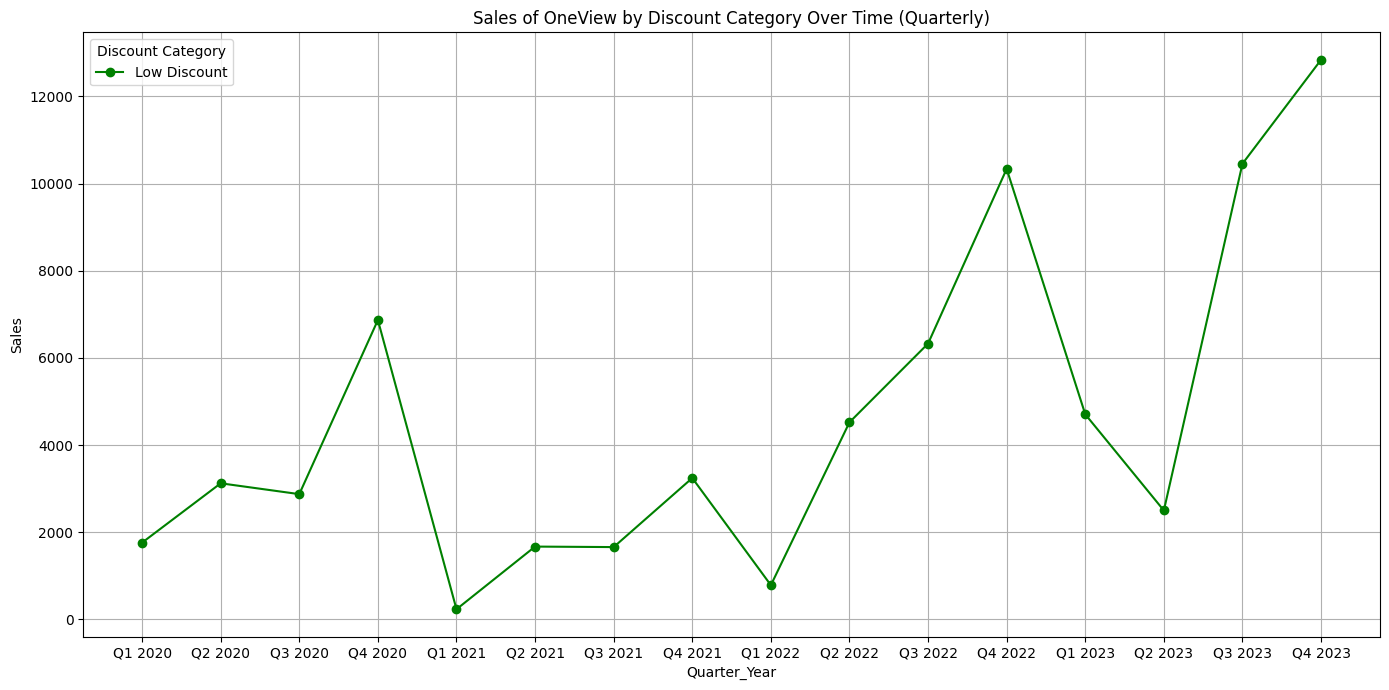

In [798]:
# Filter the data to include only the product "OneView"
contact_matcher_data = df[(df['Product'] == 'ContactMatcher')&(df['Country'] == 'United States')]

# Group the data by 'Year' and 'Quarter' and 'Discount Category', and sum the sales for each quarter
quarterly_sales = contact_matcher_data.groupby(['Year', 'Quarter', 'Discount Category'])['Sales'].sum().unstack(fill_value=0)

# Combine 'Year' and 'Quarter' to form 'Quarter_Year' as a string
quarterly_sales.index = quarterly_sales.index.map(lambda x: f"Q{x[1]} {x[0]}")

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each discount category with specified colors
colors = {'No Discount': 'blue', 'Low Discount': 'green', 'Medium Discount': 'orange', 'High Discount': 'red'}
for discount_category in quarterly_sales.columns:
    ax.plot(quarterly_sales.index, quarterly_sales[discount_category], marker='o', linestyle='-', color=colors.get(discount_category, 'black'), label=discount_category)

# Add labels, title, and legend
ax.set_xlabel('Quarter_Year')
ax.set_ylabel('Sales')
ax.set_title('Sales of OneView by Discount Category Over Time (Quarterly)')
ax.legend(title='Discount Category')
ax.grid(True)

plt.tight_layout()
plt.show()


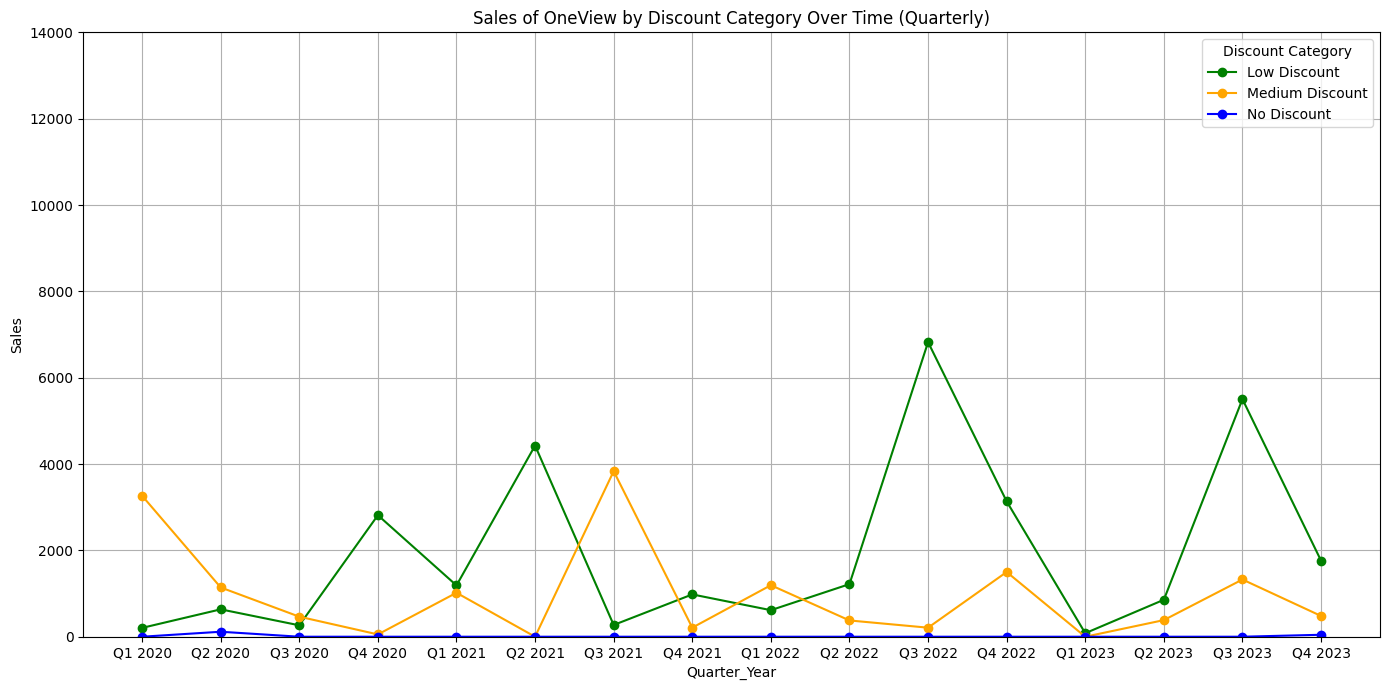

In [799]:
# Filter the data to include only the product "OneView"
contact_matcher_data = df[(df['Product'] == 'ContactMatcher')&(df['Country'] == 'United Kingdom')]

# Group the data by 'Year' and 'Quarter' and 'Discount Category', and sum the sales for each quarter
quarterly_sales = contact_matcher_data.groupby(['Year', 'Quarter', 'Discount Category'])['Sales'].sum().unstack(fill_value=0)

# Combine 'Year' and 'Quarter' to form 'Quarter_Year' as a string
quarterly_sales.index = quarterly_sales.index.map(lambda x: f"Q{x[1]} {x[0]}")

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each discount category with specified colors
colors = {'No Discount': 'blue', 'Low Discount': 'green', 'Medium Discount': 'orange', 'High Discount': 'red'}
for discount_category in quarterly_sales.columns:
    ax.plot(quarterly_sales.index, quarterly_sales[discount_category], marker='o', linestyle='-', color=colors.get(discount_category, 'black'), label=discount_category)

# Add labels, title, and legend
ax.set_xlabel('Quarter_Year')
ax.set_ylabel('Sales')
ax.set_title('Sales of OneView by Discount Category Over Time (Quarterly)')
ax.legend(title='Discount Category')
ax.grid(True)
ax.set_ylim(0,14000)
plt.tight_layout()
plt.show()


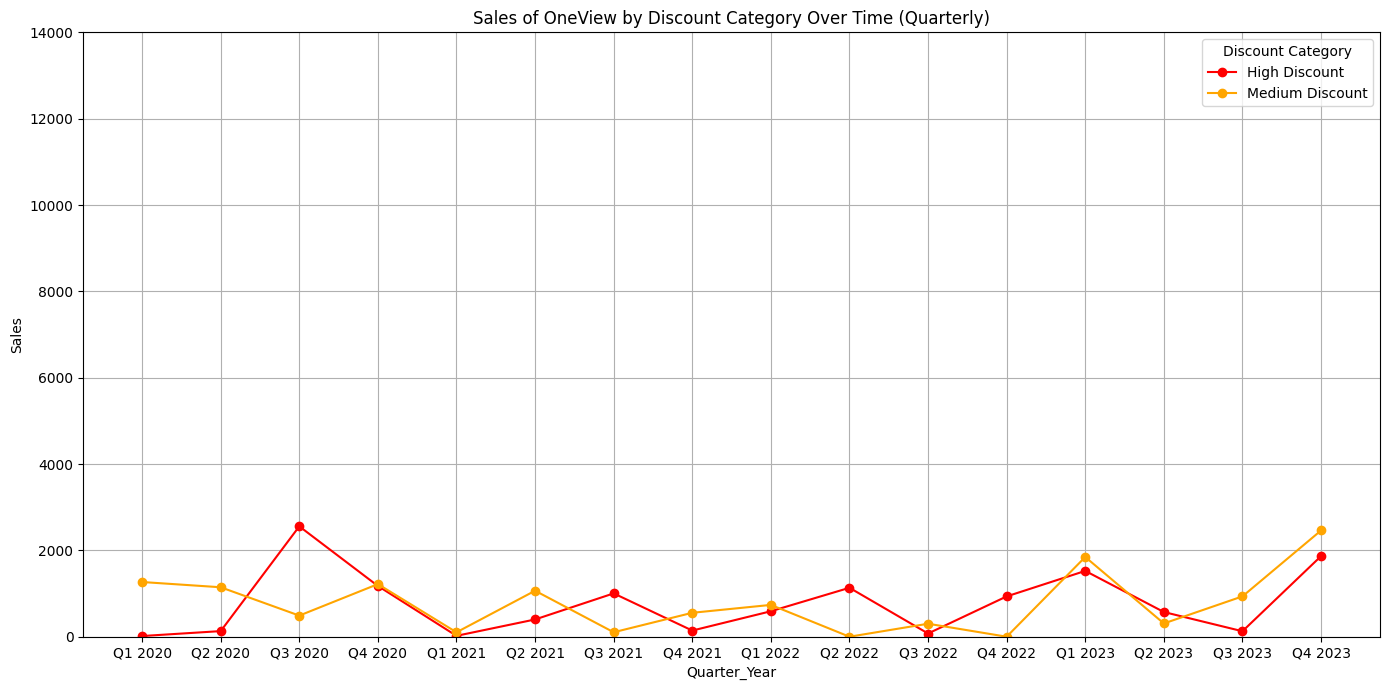

In [800]:
# Filter the data to include only the product "OneView"
contact_matcher_data = df[(df['Product'] == 'ContactMatcher')&(df['Country'] == 'Japan')]

# Group the data by 'Year' and 'Quarter' and 'Discount Category', and sum the sales for each quarter
quarterly_sales = contact_matcher_data.groupby(['Year', 'Quarter', 'Discount Category'])['Sales'].sum().unstack(fill_value=0)

# Combine 'Year' and 'Quarter' to form 'Quarter_Year' as a string
quarterly_sales.index = quarterly_sales.index.map(lambda x: f"Q{x[1]} {x[0]}")

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each discount category with specified colors
colors = {'No Discount': 'blue', 'Low Discount': 'green', 'Medium Discount': 'orange', 'High Discount': 'red'}
for discount_category in quarterly_sales.columns:
    ax.plot(quarterly_sales.index, quarterly_sales[discount_category], marker='o', linestyle='-', color=colors.get(discount_category, 'black'), label=discount_category)

# Add labels, title, and legend
ax.set_xlabel('Quarter_Year')
ax.set_ylabel('Sales')
ax.set_title('Sales of OneView by Discount Category Over Time (Quarterly)')
ax.legend(title='Discount Category')
ax.grid(True)
ax.set_ylim(0,14000)

plt.tight_layout()
plt.show()


It can be seen that in the top three countries with the highest sales, discounts are utilized to increase sales figures. Therefore, we have a strong assumption that ContactMatcher is highly sensitive to discounts. Now let's examine the data for OneView.

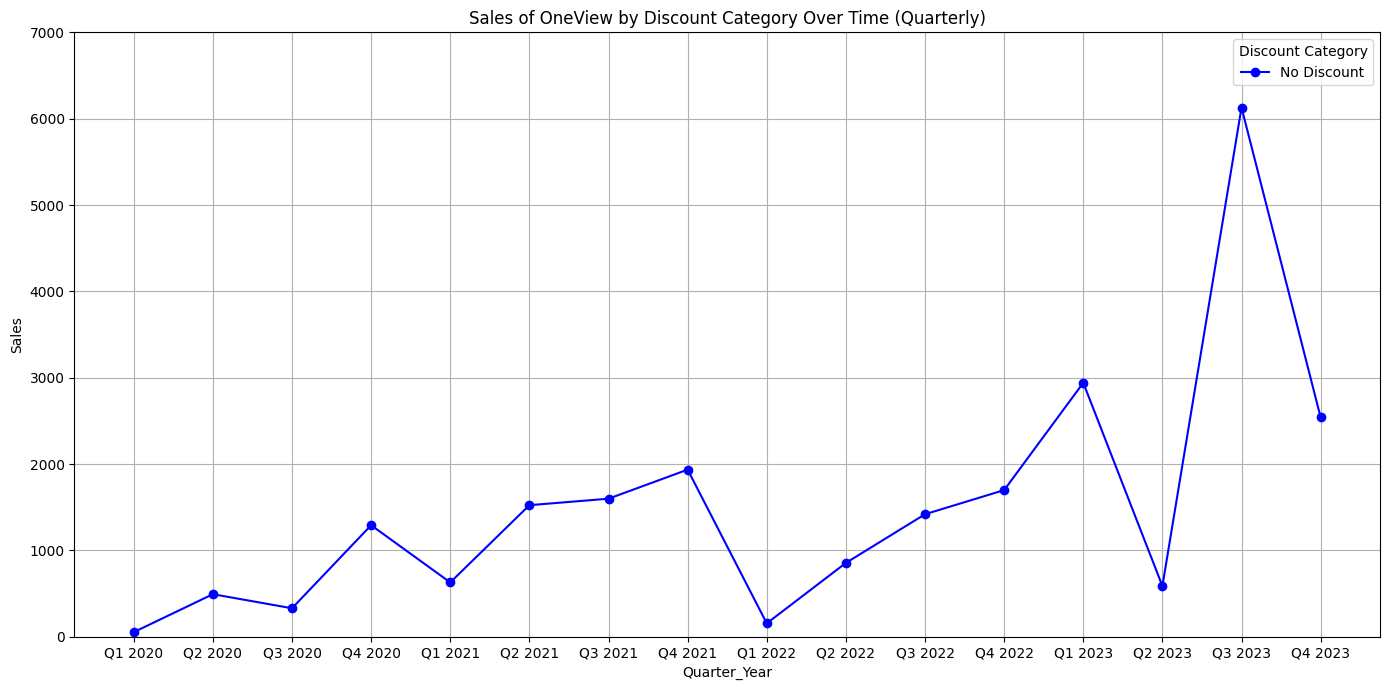

In [801]:
# Filter the data to include only the product "OneView"
oneview_data = df[(df['Product'] == 'OneView')&(df['Country'] == 'United States')]

# Group the data by 'Year' and 'Quarter' and 'Discount Category', and sum the sales for each quarter
quarterly_sales = oneview_data.groupby(['Year', 'Quarter', 'Discount Category'])['Sales'].sum().unstack(fill_value=0)

# Combine 'Year' and 'Quarter' to form 'Quarter_Year' as a string
quarterly_sales.index = quarterly_sales.index.map(lambda x: f"Q{x[1]} {x[0]}")

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each discount category with specified colors
colors = {'No Discount': 'blue', 'Low Discount': 'green', 'Medium Discount': 'orange', 'High Discount': 'red'}
for discount_category in quarterly_sales.columns:
    ax.plot(quarterly_sales.index, quarterly_sales[discount_category], marker='o', linestyle='-', color=colors.get(discount_category, 'black'), label=discount_category)

# Add labels, title, and legend
ax.set_xlabel('Quarter_Year')
ax.set_ylabel('Sales')
ax.set_title('Sales of OneView by Discount Category Over Time (Quarterly)')
ax.legend(title='Discount Category')
ax.grid(True)
ax.set_ylim(0,7000)
plt.tight_layout()
plt.show()


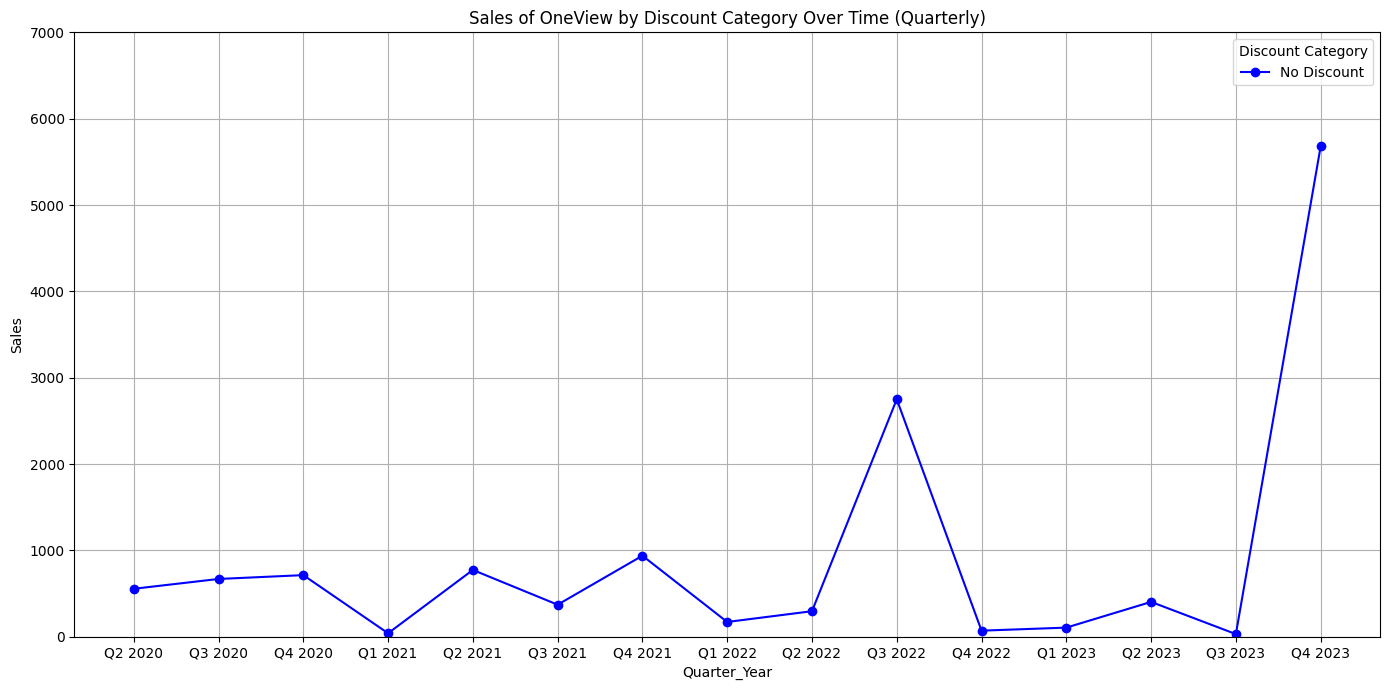

In [802]:
# Filter the data to include only the product "OneView"
oneview_data = df[(df['Product'] == 'OneView')&(df['Country'] == 'United Kingdom')]

# Group the data by 'Year' and 'Quarter' and 'Discount Category', and sum the sales for each quarter
quarterly_sales = oneview_data.groupby(['Year', 'Quarter', 'Discount Category'])['Sales'].sum().unstack(fill_value=0)

# Combine 'Year' and 'Quarter' to form 'Quarter_Year' as a string
quarterly_sales.index = quarterly_sales.index.map(lambda x: f"Q{x[1]} {x[0]}")

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each discount category with specified colors
colors = {'No Discount': 'blue', 'Low Discount': 'green', 'Medium Discount': 'orange', 'High Discount': 'red'}
for discount_category in quarterly_sales.columns:
    ax.plot(quarterly_sales.index, quarterly_sales[discount_category], marker='o', linestyle='-', color=colors.get(discount_category, 'black'), label=discount_category)

# Add labels, title, and legend
ax.set_xlabel('Quarter_Year')
ax.set_ylabel('Sales')
ax.set_title('Sales of OneView by Discount Category Over Time (Quarterly)')
ax.legend(title='Discount Category')
ax.grid(True)
ax.set_ylim(0,7000)
plt.tight_layout()
plt.show()


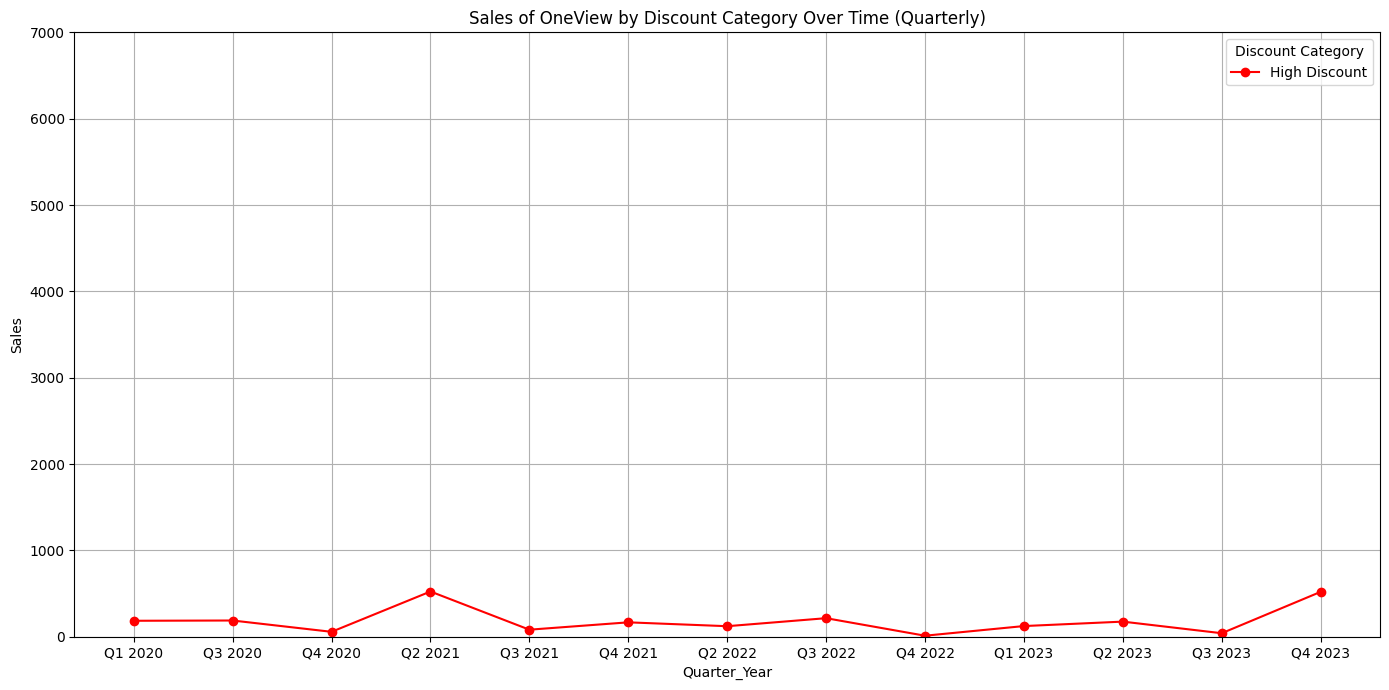

In [803]:
# Filter the data to include only the product "OneView"
oneview_data = df[(df['Product'] == 'OneView')&(df['Country'] == 'Japan')]

# Group the data by 'Year' and 'Quarter' and 'Discount Category', and sum the sales for each quarter
quarterly_sales = oneview_data.groupby(['Year', 'Quarter', 'Discount Category'])['Sales'].sum().unstack(fill_value=0)

# Combine 'Year' and 'Quarter' to form 'Quarter_Year' as a string
quarterly_sales.index = quarterly_sales.index.map(lambda x: f"Q{x[1]} {x[0]}")

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each discount category with specified colors
colors = {'No Discount': 'blue', 'Low Discount': 'green', 'Medium Discount': 'orange', 'High Discount': 'red'}
for discount_category in quarterly_sales.columns:
    ax.plot(quarterly_sales.index, quarterly_sales[discount_category], marker='o', linestyle='-', color=colors.get(discount_category, 'black'), label=discount_category)

# Add labels, title, and legend
ax.set_xlabel('Quarter_Year')
ax.set_ylabel('Sales')
ax.set_title('Sales of OneView by Discount Category Over Time (Quarterly)')
ax.legend(title='Discount Category')
ax.grid(True)
ax.set_ylim(0,7000)
plt.tight_layout()
plt.show()


In this scenario, we observe that in Japan, efforts to boost OneView sales with high discounts prove ineffective, with the highest peak reaching only 500. Conversely, in the United Kingdom, where no discounts are applied, the highest peak exceeds 2600. Additionally, the United States shows no subscriptions for this product. This leads us to the assumption that the OneView product is not sensitive to discounts.

### Business Question 5

What approaches can be implemented to optimize sensitive product discounts or reduce insensitive product discounts to maintain competitiveness of the sales?

Discount amount refers to the discount provided for each transaction.

In [804]:
df['Discount Amount'] = (df['Sales'] / (1 - df['Discount'])) - df['Sales']

Off-Peak Periods:

Strategically utilize off-peak periods or slower business days to run flash sales or limited-time promotions.
By offering discounts during these times, you can stimulate sales and attract customers during quieter periods, maximizing sales potential.

Peak Demand Periods:

Identify peak demand periods for your products or services, which could be seasonal, monthly, weekly, or even daily.
Time your discounts to coincide with these peak demand periods to capitalize on increased consumer interest and purchasing behavior.
For example, offering discounts on winter clothing in the fall or holiday-themed products during festive seasons can leverage heightened demand.

In [805]:
df_contactmatcher = df[df['Product']=='ContactMatcher']
display(
pd.crosstab(index=df_contactmatcher['Month'],
            columns='Count').sort_values(by='Count', ascending=True).T)
df_contactmatcher[['Month','Discount Amount']].groupby('Month').sum().sort_values('Discount Amount',ascending=False).round(1).T

Month,February,January,March,April,July,May,June,August,October,September,December,November
col_0,,,,,,,,,,,,
Count,42,63,101,106,106,112,116,120,143,211,213,222


Month,December,November,September,October,July,August,April,January,June,March,May,February
Discount Amount,35267.4,31959.7,26815.6,20719.7,18153.0,17113.0,15507.7,11246.3,10044.3,9004.5,7399.3,4560.5


It is evident that we can increase the discount for ContactMatcher in February. then we can boost the discount at November in peak demand periond

In [806]:
df_contactmatcher = df[df['Product']=='OneView']
display(
pd.crosstab(index=df_contactmatcher['Month'],
            columns='Count').sort_values(by='Count', ascending=True).T)
df_contactmatcher[['Month','Discount Amount']].groupby('Month').sum().sort_values('Discount Amount',ascending=False).round(1).T

Month,January,February,July,October,June,March,April,August,May,September,November,December
col_0,,,,,,,,,,,,
Count,10,16,24,28,29,31,34,41,41,61,64,72


Month,April,December,September,March,November,May,June,August,October,July,January,February
Discount Amount,3082.5,2803.7,2717.0,2351.7,2220.2,1451.4,1242.4,1079.8,732.6,684.9,632.2,452.1


We can see in April where offer the higest discount yer experience small stransaction. We know the OneView are insensitive to discount so we can reduce our discount at april to maximize our sales and monitor the impact of these changes on sales to ensure that reducing the discount does not negatively affect the overall sales volume. If the sales volume remains stable or improves, we can consider applying similar reductions in other months as well.

### CONCLUSION AND RECOMMENDATION

We have a strong assumption that the ContactMatcher product is highly sensitive to discounts. Therefore, from a business perspective, we need to maintain the use of discounts but in the right intervals and amounts. While discounts can boost sales, they can also pose a risk to profitability. Hence, the company's discount policy needs careful consideration. We can give more discount in February, then we can boost the discount at November in peak demand periond

On the other hand, for the OneView product, we could consider reducing the use of discounts. It's evident that OneView is not sensitive to discounts, indicating that it has its own market segment and unique selling points. Even without discounts, customers still subscribe to the product. What we need here is optimization of campaigns or similar strategies. So we can try to reduce our discount in April and monitor the impact of these changes on sales to ensure that reducing the discount does not negatively affect the overall sales volume. If the sales volume remains stable or improves, we can consider applying similar reductions in other months as well.

In [807]:
# df.to_csv('final_capstone.csv', index=True)